# Preprocesamiento de Datos

El preprocesamiento de datos - a veces también conocido como transformación de datos o, incluso, ingeniería de atributos - es probablemente una de las parte más importante del trabajo del Data Scientist, tal vez la más importante. Como habrás visto en la bitácora, son muchos los pasos involucrados en este proceso, y eso que no los hemos mencionados a todos, pero sí los más importantes. En este notebook, trabajaremos sobre cuatro grandes áreas:

1. Valores Faltantes
2. Valores Atípicos
3. Escalado de Datos
4. Encoders

Como este notebook corresponde a dos bitácoras y encuentros (19 y 20), no te preocupes si todavía no sabes de qué se tratan los puntos 3 y 4.

Antes de arrancar, una pregunta usual que suele surgir es si usar Pandas o Scikit-Learn, ya que algunos de estos pasos pueden hacerse indistintamente con cualquiera de las dos librerías. Como siempre, la respuesta depende de lo que quieras hacer - y también con cuál herramienta te sientas más cómodo/a. Pero una respuesta rápida es que si estas explorando datos, mejor usar Pandas. Si estás en un flujo de Machine Learning, Scikit-Learn. Probablemente, termines usando las dos en un mismo notebook.

#### Algunas referencias

**Muy útil:** [documentación de Scikit-Learn sobre preprocesamiento de datos](https://scikit-learn.org/stable/modules/preprocessing.html)

**Valores Faltantes**

* En Pandas, explora las funcionalidades `isna()`, `dropna()` y `fillna()`.
* En Scikit-Learn, explora la clase `SimpleImputer`.

**Definición:**
* isna() is used to detect missing values. It return a boolean same-sized object indicating if t he values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. https://www.geeksforgeeks.org/python-pandas-dataframe-isna/
* isnull is an alias for isna: https://stackoverflow.com/questions/52086574/pandas-isna-and-isnull-what-is-the-difference#:~:text=They%20both%20are%20same.,()%20%2C%20it%20checks%20NaN%20values.
* dropna() is used to remove missing values. https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php
* fillna() manages and let the user replace NaN values with some value of their own https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
* SimpleImputer permite sustituir valores nulos por otros valores según varias estrategias disponibles. La estrategia a ejecutar se indica mediante el parámetro strategy. https://www.interactivechaos.com/python/function/simpleimputer



**Valores Atípicos**

* Para aplicar los criterios que mencionamos, bastará usar las técnicas de visualización que ya conoces, calcular percentiles, promedios y desviaciones estándar con NumPy o Pandas, y usar máscaras.
* En Scikit-Learn existen métodos para trabajar con valores atípicos. Si bien no los utilizaremos, no está demás si quieres mirarlos [aquí](https://scikit-learn.org/stable/modules/outlier_detection.html).

**Escalado de Datos**
* Se puede hacer a mano con las herramientas de NumPy o Pandas
* En Scikit-Learn existe una variedad de clases que pueden ayudarte en este proceso. Puedes mirar en el enlace a la documentación de Scikit-Learn que dejamos más arriba.

**Encoders**
* En Pandas, explora las funcionalidades `get_dummies()` y `map()`

**definición:**
get_dummies() function is used to convert categorical variable into dummy/indicator variables. https://www.w3resource.com/pandas/get_dummies.php

map() function is used to map values of Series according to input correspondence. Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series. https://www.w3resource.com/pandas/series/series-map.php

LabelENcoder() class Encode target labels with value between 0 and n_classes-1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html



* En Scikit-Learn, explora la clase `LabelEncoder` y `OneHotEncoder`.


## 1. Valores Faltantes

En este ejercicio te proveemos de un dataset de seis columnas y 1500 instancias. Salvo una columna, `V1`, todas tienen valores faltantes. De las columnas con valores faltantes:
* Dos tienen valores faltantes MCAR (el valor faltante es completamente al azar y no depende de otras variables). Estaciones meteorologicas que no toman un valor (error de medicion porque talvez deja de funcionar o no se sabe ó error humano).

* Una tiene valores faltantes MAR (la probabilidad de valor faltante depende de otra variable).
* Una tiene valores faltantes MNAR (la probabilidad de valor faltante depende de esa misma variable).

### 1.1 MCAR, MAR o MNAR - **Opcional**

El objetivo de esta sección es que analisis el origen de estos valores faltantes. Para ello:

1. Abre los datos y explóralos. Con ese fin, te recomendamos hacer un `pairplot` (con y sin `hue`) de Seaborn y contar los valores faltantes por columna. ¿Qué tipo de datos son?¿Cuáles son sus distribuciones?¿Te parece que hay alguna columna correlacionada con otra?

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


#genero el heatmap en una función con una estructura más moldeable.
def Correlation_fig(X):
    """
    Genera un heatmap con una estructura especifica para mi set de datos.
    """
    sns.set(style="whitegrid")
    corr = X.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    plt.figure(figsize=(8,8))
    sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,vmin=0, cbar=True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12})
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    plt.title('Correlación de Atributos')
    plt.show()




from google.colab import drive
drive.mount('/content/drive') #monto el drive en collab y leo el file "DS_Proyecto_01_Datos_Properati.csv" insertando la url con extension csv

ValorAtipico1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_19_Data_VA1.csv', sep=',',engine='python')
ValorAtipico2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_19_Data_VA2.csv', sep=',',engine='python')
ValorFaltante=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_19_Data_con_VF.csv', sep=',',engine='python')
Valor_distrofia=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_19_Distrofia.csv', sep=',',engine='python')

#Muestra el metadato (key) o informacion acerca de que trata cada columna.
print(ValorAtipico1.columns) 
print(ValorAtipico2.columns)
print(ValorFaltante.columns)
print(Valor_distrofia.columns)

#no tiene NAN
print(ValorAtipico1.head())
print(ValorAtipico1.shape)

#no tiene NAN
print(ValorAtipico2.head())
print(ValorAtipico2.shape)


#tiene nana
print(ValorFaltante.head())
print(ValorFaltante.shape)



Mounted at /content/drive
Index(['Datos'], dtype='object')
Index(['Datos'], dtype='object')
Index(['V1', 'V2', 'V3', 'V4', 'V5'], dtype='object')
Index(['edad', 'mes', 'año', 'CK', 'H', 'PK', 'LD', 'DMD'], dtype='object')
      Datos
0  2.370556
1  3.437876
2  6.300131
3  5.403170
4  5.722120
(1000, 1)
      Datos
0  2.370556
1  3.437876
2  6.300131
3  5.403170
4  5.722120
(1000, 1)
  V1   V2           V3          V4           V5
0  C  1.0   986.175237  184.258917  2224.638050
1  C  1.0   994.130276         NaN  2570.213101
2  A  1.0   985.782622  196.893581  2309.238832
3  A  1.0  1029.464887  192.063247  2349.259233
4  A  1.0  1004.357092         NaN  2474.036357
(1500, 5)


recomendamos hacer un `pairplot` (con y sin `hue`) de Seaborn y contar los valores faltantes por columna. ¿Qué tipo de datos son?¿Cuáles son sus distribuciones?¿Te parece que hay alguna columna correlacionada con otra?

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64


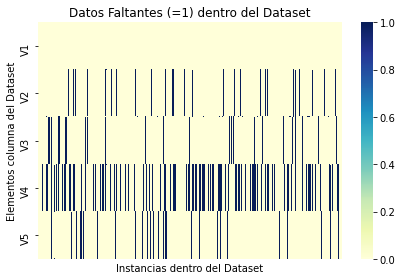

V1 y V2 son datos categoricos y V3, V4y V5 son datos continuos

La distribución Sin hue muestra que V2 es bimodal (0 o 1), mientras que las demás tiene una distribución aleatoria


<Figure size 432x288 with 0 Axes>

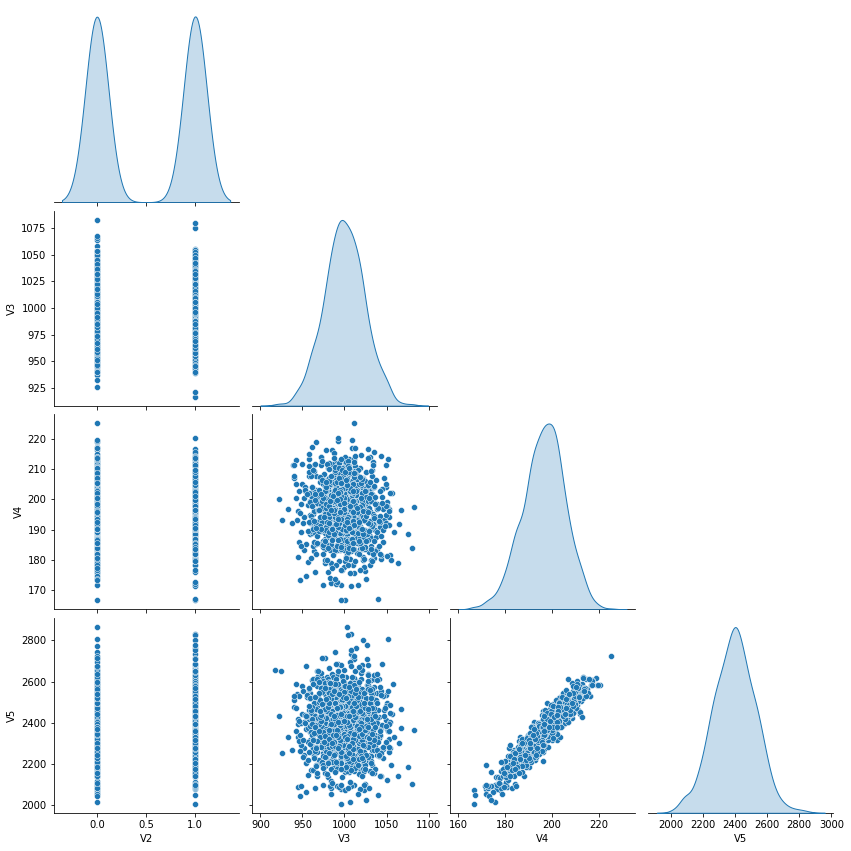

la distribución Con Hue con V1, categorizo los datos en funcion de A B o C


<Figure size 432x288 with 0 Axes>

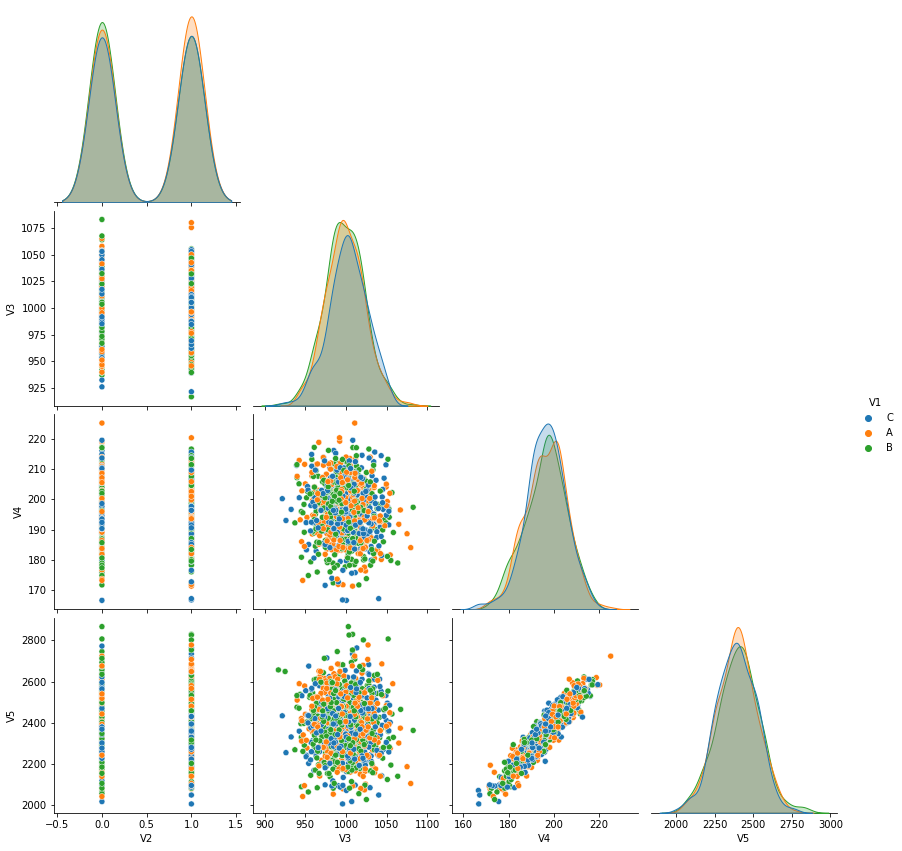

la distribución Con Hue con V2, categorizo los datos en funcion de 0 o 1


<Figure size 432x288 with 0 Axes>

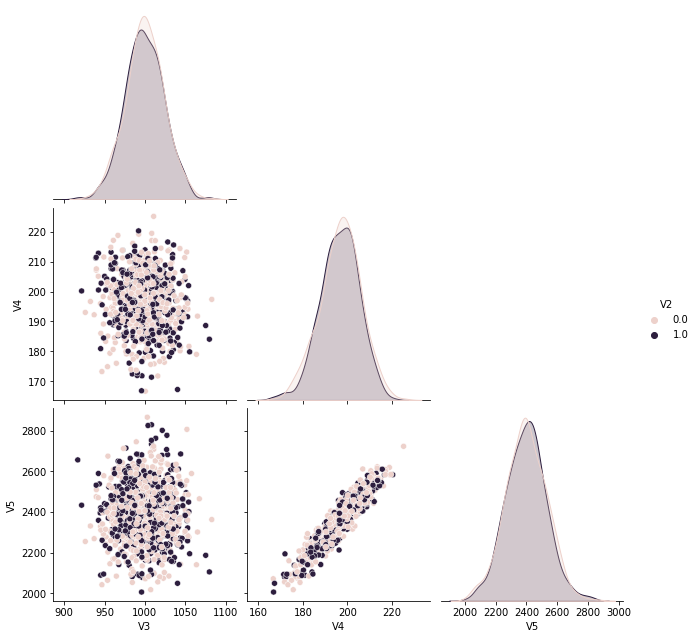

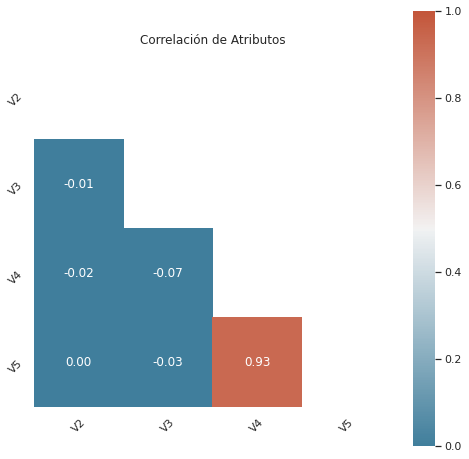

In [ ]:
#Trabajo con los datos ValorFaltante
#cuento la cantidad de datos faltantes por columna
print(ValorFaltante.isna().sum())
plt.figure()
Dat=ValorFaltante.isnull()
heat=sns.heatmap(Dat.T,  cmap="YlGnBu",xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()
plt.show()

#¿Qué tipo de datos son?
print('V1 y V2 son datos categoricos y V3, V4y V5 son datos continuos\n')


#¿Cuáles son sus distribuciones?
print('La distribución Sin hue muestra que V2 es bimodal (0 o 1), mientras que las demás tiene una distribución aleatoria')

plt.figure()
sns.pairplot(ValorFaltante,diag_kind="kde" , corner=True, height=3) #hue=V1
plt.show()

print('la distribución Con Hue con V1, categorizo los datos en funcion de A B o C')
plt.figure()
sns.pairplot(ValorFaltante,diag_kind="kde",hue='V1' , corner=True, height=3) #hue=V1
plt.show()

print('la distribución Con Hue con V2, categorizo los datos en funcion de 0 o 1')
plt.figure()
sns.pairplot(ValorFaltante,diag_kind="kde",hue='V2' , corner=True, height=3, hue_order=['A', 'B', 'C']) #hue=V1
plt.show()



#¿Te parece que hay alguna columna correlacionada con otra? analizo el heatmap de correlacion
#sólo puedo correlacionar variables numéricas
Correlation_fig(ValorFaltante)
#se observa una marcada correlación entre V4 y V5


2. Buscaremos decidir el mecanismo que dio origen a los valores faltante de cada columna. Para ello, ten en cuenta que:
* Para simplificar el análisis, si hay valores MAR, la dependencia sólo puede ser con la columna categórica sin valores faltantes, `V1`. Entonces, basta que solamente pruebes dependencia con esa variable. Te puede ser **muy útil** [esta pregunta de Stack Overflow](https://stackoverflow.com/questions/43321455/pandas-count-null-values-in-a-groupby-function/43322220).


* MNAR puede es difícil de estudiar si no tenemos conocimiento del tema o si no hay una variable que correlacione con la variable que queremos estudiar para usar de *proxy*. ¿Qué queremos decir con esto? Imaginate que tienes una planilla con sueldos mensuales de personas y vas a borrar valores con mayor probabilidad si son más altos. Pero no te diste cuenta que en otra planilla figuran el estimativo del sueldo anual, lo cual correlaciona fuertemente con el sueldo mensual. Entonces, si quieres ver si la probabilidad de borrar un valor estaba relacionada con ese valor, lo que puedes hacer es crear intervalos para la variables sin valores faltantes - es decir, crear rangos de sueldos anuales - y contar cuántas instancias que caen dentro de ese intervalo tienen valores faltantes en la variable borrada (sueldo mensual). Al principio es muy confuso, pero piénsalo un rato y vas a ver que tiene sentido.
* MCAR es un mecanismo que puede ser difícil de estudiar. Tal vez es más probable que llegues a él *por descarte* de los otros dos mecanismos.


**MAR con respecto a `V1`**

El codigo me indica que en función de los datos faltantes en un atributo que me diga en qué valor de V1 (la categoría) cae el valor faltante. En funcion de eso veo el total de valores faltantes en un atributo en función de la categoría.


`Groupby de V1 por clase Buscamos relacion con la variable categorica, buscamos un patron, algun indicio con alguna de las categorias, tiene que haber una probabilidad con otra variable.`

Dejamos la línea casi completa para el caso de `V2`:

In [ ]:
#se intuye que hay una especie de dependencia de V2 respecto V1.
#V1 podría ingerir en V2 para tener datos faltantes.


#V2 en funcion de V1
#aquí con respecto a V1. saco los datos faltantes de v2 y los agrupo por categoria V1.
#ejemplo V1 empresas
#veo en la varaible V2 impuestos

#la iglesia no paga impuestos , según V2 V1=iglesias tiene 1 NA


ValorFaltante.V2.isnull().groupby([ValorFaltante['V1']]).sum().astype(int).reset_index(name='count')
#le asignamos el nombre count a la columna que suma los nulos por clase


,V1,count
0,A,39
1,B,52
2,C,68


In [ ]:
#V3 en funcion de V1
#V1 podría inferir que para V3 en la categoria B no haya datos faltantes.
ValorFaltante.V3.isnull().groupby([ValorFaltante['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,30
1,B,0
2,C,74


In [ ]:
#V4 en funcion de V1
ValorFaltante.V4.isnull().groupby([ValorFaltante['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,139
1,B,147
2,C,127


In [ ]:
#V5 en funcion de V1
ValorFaltante.V5.isnull().groupby([ValorFaltante['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,34
1,B,44
2,C,40


Notar que la unica variable que parece tener una dependencia fuerte en sus valores faltantes con V1 es V3.
Puedo ver esto a partir de categoria, o en el caso continuo con "rangos"

V3 en funcion de V1
`Encontramos un patron. En B no tiene valores faltantes, la probabilidad de datos faltantes aumenta con A y C y es cero en B`

**MNAR**
* MNAR puede es difícil de estudiar si no tenemos conocimiento del tema o si no hay una variable que correlacione con la variable que queremos estudiar para usar de *proxy*. ¿Qué queremos decir con esto? Imaginate que tienes una planilla con sueldos mensuales de personas y vas a borrar valores con mayor probabilidad si son más altos. Pero no te diste cuenta que en otra planilla figuran el estimativo del sueldo anual, lo cual correlaciona fuertemente con el sueldo mensual. Entonces, si quieres ver si la probabilidad de borrar un valor estaba relacionada con ese valor, lo que puedes hacer es crear intervalos para la variables sin valores faltantes - es decir, crear rangos de sueldos anuales - y contar cuántas instancias que caen dentro de ese intervalo tienen valores faltantes en la variable borrada (sueldo mensual). Al principio es muy confuso, pero piénsalo un rato y vas a ver que tiene sentido.

* MCAR es un mecanismo que puede ser difícil de estudiar. Tal vez es más probable que llegues a él *por descarte* de los otros dos mecanismos.

Las únicas variables correlacionadas son `V4` y `V5`, ambas con valores faltantes. Entonces, podemos usar una para ver si los valores faltantes de la otra son **MNAR**.

Arranquemos estudiando los valores faltante en `V5`. Para ello, debemos binear `V4` y contar cuántos valores faltantes de `V5` caen en cada intervalo. Entonces, creamos los intervalos para `V4`

In [ ]:
#genero intervalos de una distribución en función del rango de valores de V4.
#cada valor de V4 cae en una casilla y no se intersectan valores próximos
#193.553401 ->	(190.071, 193.974]
#196.373516 ->(193.974, 197.876]

#me pone la variable continua y la "transforma" en categorica con los rangos
ValorFaltante['V4-intervalos'] = pd.cut(ValorFaltante.V4, bins  = 15)
ValorFaltante

,V1,V2,V3,V4,V5,V4-intervalos
0,C,1.0,986.175237,184.258917,2224.638050,"(182.265, 186.168]"
1,C,1.0,994.130276,NaN,2570.213101,NaN
2,A,1.0,985.782622,196.893581,2309.238832,"(193.974, 197.876]"
3,A,1.0,1029.464887,192.063247,2349.259233,"(190.071, 193.974]"
4,A,1.0,1004.357092,NaN,2474.036357,NaN
...,...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694,"(190.071, 193.974]"
1496,C,0.0,991.730134,193.553401,2277.045998,"(190.071, 193.974]"
1497,B,0.0,1032.150519,NaN,2347.760632,NaN
1498,C,1.0,984.522924,196.373516,2393.847484,"(193.974, 197.876]"


y contamos cuántas instancias por intervalo tienen valores faltantes en `V5`.

In [ ]:
#me agrupa los valores faltantes de V5 en función de las categorías (en este caso los intervalos de mi distribución) de V4
vf_V4V5 = ValorFaltante.V5.isnull().groupby([ValorFaltante['V4-intervalos']]).sum().astype(int).reset_index(name='count')
vf_V4V5

#es "raro" es que en los rangos del medio hay mayor cantidad de datos faltantes 
#los datos faltantes podrían no deberse a algo aleatoria sino por una dependencia con otra variable.


,V4-intervalos,count
0,"(166.596, 170.557]",0
1,"(170.557, 174.46]",0
2,"(174.46, 178.363]",1
3,"(178.363, 182.265]",2
4,"(182.265, 186.168]",5
5,"(186.168, 190.071]",6
6,"(190.071, 193.974]",17
7,"(193.974, 197.876]",12
8,"(197.876, 201.779]",20
9,"(201.779, 205.682]",13


Pero en realidad lo que nos interesa es la frecuencia de estos valores faltantes, porque no todos los intervalos tienen la misma cantidad de instancias.

In [ ]:
#creo una columna de frecuencia donde divido el valor de mi conteo de datos faltantes en función de la cantidad de valores que tengo por intervalo
#esto permite saber la verdadera dimensión de datos porque en la anterior operación se obvian los Nans.
vf_V4V5['freq'] = vf_V4V5['count']/ValorFaltante.groupby([ValorFaltante['V4-intervalos']]).count()['V4'].values

#vf_V4V5['freq'] = vf_V4V5['count']/ValorFaltante.groupby([ValorFaltante['V4-intervalos']]).count()['V4'].value_counts

vf_V4V5

,V4-intervalos,count,freq
0,"(166.596, 170.557]",0,0.000000
1,"(170.557, 174.46]",0,0.000000
2,"(174.46, 178.363]",1,0.062500
3,"(178.363, 182.265]",2,0.051282
4,"(182.265, 186.168]",5,0.060976
5,"(186.168, 190.071]",6,0.063830
6,"(190.071, 193.974]",17,0.104938
7,"(193.974, 197.876]",12,0.065217
8,"(197.876, 201.779]",20,0.109290
9,"(201.779, 205.682]",13,0.084416


Para que sea más fácil e informativo el gráfico, agregamos a este dataframe el punto medio de cada intervalo.

In [ ]:
#toma el valor medio del intervalo
vf_V4V5["bin_centres"] = vf_V4V5["V4-intervalos"].apply(lambda x: x.mid)
vf_V4V5

,V4-intervalos,count,freq,bin_centres
0,"(166.596, 170.557]",0,0.000000,168.5765
1,"(170.557, 174.46]",0,0.000000,172.5085
2,"(174.46, 178.363]",1,0.062500,176.4115
3,"(178.363, 182.265]",2,0.051282,180.3140
4,"(182.265, 186.168]",5,0.060976,184.2165
5,"(186.168, 190.071]",6,0.063830,188.1195
6,"(190.071, 193.974]",17,0.104938,192.0225
7,"(193.974, 197.876]",12,0.065217,195.9250
8,"(197.876, 201.779]",20,0.109290,199.8275
9,"(201.779, 205.682]",13,0.084416,203.7305


y finalmente, graficamos

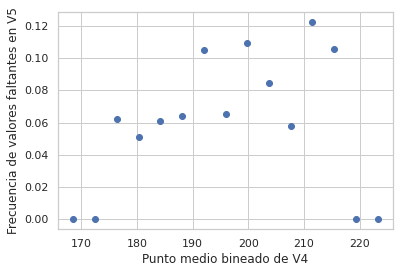

In [ ]:
plt.scatter(vf_V4V5['bin_centres'], vf_V4V5['freq'])
plt.xlabel('Punto medio bineado de V4')
plt.ylabel('Frecuencia de valores faltantes en V5')
plt.show()

#x es el punto medio de V4 vs datos faltantes de V5
#¿hay una relación entre ellos?
#no parecen tan aleatorios (serían más dispersos), como una "montañita". si fueran datos uniformemente distribuidos, habría una nube de puntos
#la probabilidad de que haya un punto entre 0,06 y 0,12 es mayor que entre 0 y 0,04 (no es uniforme! no hay una nube de puntos) --> acá hay algo que llama la atención esos datos cerca de 0

#pero no habría una relación funcional clara (que tenga explicabilidad) por lo cual talvez es cuasi aleatorio (no totalmente aleatorio->se podría modelar, si es uniformemente aleatorio no podría modelar)
#un mapa de calor es una buena visualización para eso (si se puede ver una grafica, ó si no puedo veo la correlación entre variables)


¿Te parece que da alguna información este gráfico? No te apures a sacar conclusiones. Vuelve a repetir los pasos, pero invirtiendo el rol de `V5` y `V4` - solamente tienes que copiar cada celda e intercalar los nombres. Una vez que hayas llegado al gráfico, ahora sí mira si puedes sacar alguna conclusión.

In [ ]:
ValorFaltante['V5-intervalos'] = pd.cut(ValorFaltante.V5, bins  = 15)
ValorFaltante

,V1,V2,V3,V4,V5,V4-intervalos,V5-intervalos
0,C,1.0,986.175237,184.258917,2224.638050,"(182.265, 186.168]","(2178.049, 2235.445]"
1,C,1.0,994.130276,NaN,2570.213101,NaN,"(2522.424, 2579.82]"
2,A,1.0,985.782622,196.893581,2309.238832,"(193.974, 197.876]","(2292.841, 2350.236]"
3,A,1.0,1029.464887,192.063247,2349.259233,"(190.071, 193.974]","(2292.841, 2350.236]"
4,A,1.0,1004.357092,NaN,2474.036357,NaN,"(2465.028, 2522.424]"
...,...,...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694,"(190.071, 193.974]","(2292.841, 2350.236]"
1496,C,0.0,991.730134,193.553401,2277.045998,"(190.071, 193.974]","(2235.445, 2292.841]"
1497,B,0.0,1032.150519,NaN,2347.760632,NaN,"(2292.841, 2350.236]"
1498,C,1.0,984.522924,196.373516,2393.847484,"(193.974, 197.876]","(2350.236, 2407.632]"


In [ ]:
#me agrupa los valores faltantes de V5 en función de las categorías (en este caso los intervalos de mi distribución) de V4
vf_V5V4 = ValorFaltante.V4.isnull().groupby([ValorFaltante['V5-intervalos']]).sum().astype(int).reset_index(name='count')
vf_V5V4


,V5-intervalos,count
0,"(2005.0, 2063.257]",0
1,"(2063.257, 2120.653]",1
2,"(2120.653, 2178.049]",0
3,"(2178.049, 2235.445]",4
4,"(2235.445, 2292.841]",9
5,"(2292.841, 2350.236]",26
6,"(2350.236, 2407.632]",39
7,"(2407.632, 2465.028]",58
8,"(2465.028, 2522.424]",79
9,"(2522.424, 2579.82]",79


In [ ]:
#creo una columna de frecuencia donde divido el valor de mi conteo de datos faltantes en función de la cantidad de valores que tengo por intervalo
#esto permite saber la verdadera dimensión de datos porque en la anterior operación se obvian los Nans.
vf_V5V4['freq'] = vf_V5V4['count']/ValorFaltante.groupby([ValorFaltante['V5-intervalos']]).count()['V5'].values
vf_V5V4


,V5-intervalos,count,freq
0,"(2005.0, 2063.257]",0,0.000000
1,"(2063.257, 2120.653]",1,0.040000
2,"(2120.653, 2178.049]",0,0.000000
3,"(2178.049, 2235.445]",4,0.049383
4,"(2235.445, 2292.841]",9,0.058824
5,"(2292.841, 2350.236]",26,0.134715
6,"(2350.236, 2407.632]",39,0.157895
7,"(2407.632, 2465.028]",58,0.254386
8,"(2465.028, 2522.424]",79,0.461988
9,"(2522.424, 2579.82]",79,0.612403


In [ ]:
#toma el valor medio del intervalo
vf_V5V4["bin_centres"] = vf_V5V4["V5-intervalos"].apply(lambda x: x.mid)
vf_V5V4


,V5-intervalos,count,freq,bin_centres
0,"(2005.0, 2063.257]",0,0.000000,2034.1285
1,"(2063.257, 2120.653]",1,0.040000,2091.9550
2,"(2120.653, 2178.049]",0,0.000000,2149.3510
3,"(2178.049, 2235.445]",4,0.049383,2206.7470
4,"(2235.445, 2292.841]",9,0.058824,2264.1430
5,"(2292.841, 2350.236]",26,0.134715,2321.5385
6,"(2350.236, 2407.632]",39,0.157895,2378.9340
7,"(2407.632, 2465.028]",58,0.254386,2436.3300
8,"(2465.028, 2522.424]",79,0.461988,2493.7260
9,"(2522.424, 2579.82]",79,0.612403,2551.1220


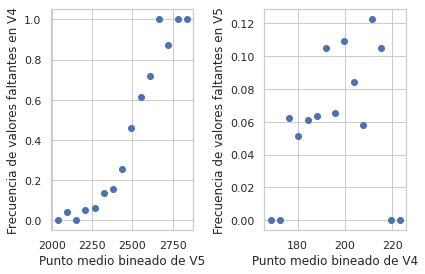

In [ ]:
plt.subplot(1,2,1)
plt.scatter(vf_V5V4['bin_centres'], vf_V5V4['freq'])
plt.xlabel('Punto medio bineado de V5')
plt.ylabel('Frecuencia de valores faltantes en V4')

plt.subplot(1,2,2)
plt.scatter(vf_V4V5['bin_centres'], vf_V4V5['freq'])
plt.xlabel('Punto medio bineado de V4')
plt.ylabel('Frecuencia de valores faltantes en V5')
plt.tight_layout()
plt.show()


#La probabilidad de valor faltante de V4 esta fuertemente correlacionado del valor V5 

#acá hay una relación entre datos faltantes entre V4 y valores V5. La misma variable V5 influye en la cantidad de datos atipicos va a tener
#mayor V5 puede aumentar la cantidad de datos faltantes que tengo  en la información.
#ejemplo x="ingreso $" y a los ricos no les gusta declarar cuanto tienen porque es más impuestos (prefieren no declarar más datos faltantes). pero las personas con menos ingreso tienden a declarar (menos datos faltantes).
#conforme aumente el ingreso las personas tienden a declarar ingreso.>mayor datos faltantes en una población de mayores ingresos


Has llegado a alguna conclusión? Entre `V4` y `V5`, ¿cuál es MNAR y cuál MCAR?¿Y `V2`?

`V4 es MNAR. V3 es MAR. Por descarte, V2 Y V5 son MCAR`

La naturaleza de los datos faltantes puede deberse a algun motivo, puedo imputarlos. si son completamente aleatorios no puedo imputarlos o son muy dificiles (si lo hago con un modelo, debo tener alguna relación entre las variables).
ejemplo con media movil (promedio movil) es bueno si hay relación entre los datos que sea facil.


## 1.2 Imputación de valores faltantes

Vamos a *imputar* los valores faltantes sobre el dataset sintético y el dataset de Distrofia. 

### 1.2.1 Dataset Sintético

Te recomendamos que:

1. Al tratarse de un dataset pequeño, puedes copiar el dataset, dejar a un lado el original y rellenar valores faltantes en la copia. De esta forma, podrás evaluar tu estrategia (ver punto siguiente) y/o comparar distintas estrategias.
1. Haz histogramas de las variables con y sin valores faltantes. Al imputar, ¿cambián las distribuciones?¿Esto está bien o mal?

**Ejercicio 1 - Challenge 1:** Comienza con una estrategia sencilla, imputar con el valor medio de cada columna usando Pandas. 

¿Para cuáles columnas tendrá sentido esto, teniendo en cuenta lo visto en el punto anterior? 

-Para las columnas numericas V3, V4 y V5.


Por las dudas, comenzamos volviendo a cargar los datos:

     V1   V2           V3          V4           V5
0     C  1.0   986.175237  184.258917  2224.638050
1     C  1.0   994.130276         NaN  2570.213101
2     A  1.0   985.782622  196.893581  2309.238832
3     A  1.0  1029.464887  192.063247  2349.259233
4     A  1.0  1004.357092         NaN  2474.036357
...  ..  ...          ...         ...          ...
1495  C  0.0   985.188653  190.366109  2302.000694
1496  C  0.0   991.730134  193.553401  2277.045998
1497  B  0.0  1032.150519         NaN  2347.760632
1498  C  1.0   984.522924  196.373516  2393.847484
1499  C  0.0  1017.399835  192.406202  2368.906782

[1500 rows x 5 columns]
     V1   V2           V3          V4           V5
0     C  1.0   986.175237  184.258917  2224.638050
2     A  1.0   985.782622  196.893581  2309.238832
3     A  1.0  1029.464887  192.063247  2349.259233
6     C  0.0   999.845701  210.629571  2485.409016
7     B  1.0   988.833333  188.131567  2300.991672
...  ..  ...          ...         ...          ...
1494  

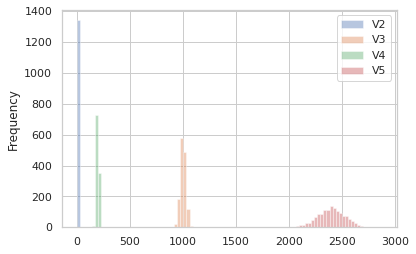

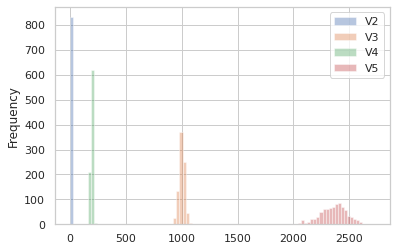

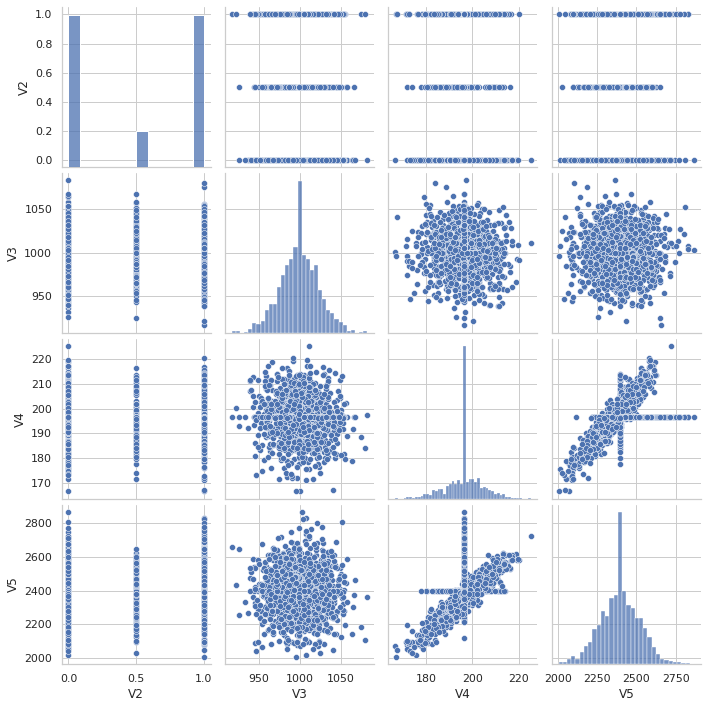

In [ ]:
ValorFaltante=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_19_Data_con_VF.csv', sep=',',engine='python')

dataVF = ValorFaltante.copy()

print(dataVF)
datasinVF=dataVF.dropna()
print(datasinVF)

#forma intuitiva es llenar con la media
dataVF1 = ValorFaltante.copy()
dataVF1.fillna(dataVF1.mean(),inplace=True) # es independiente del lugar que veo. supongo que cualquier valor faltante reemplace con la media (vale si la desviacion es pequeña y una distribucion normal es bueno, porque los datos son muy parecidos) si tiene curtosis alta, muy aplanada no es bueno

#histogramas de las variables con y sin valores faltantes.
dataVF[["V2", "V3",'V4','V5']].plot.hist(alpha=0.4, bins=100) 
datasinVF[["V2", "V3",'V4','V5']].plot.hist(alpha=0.4, bins=100) 


dataVF.isna().sum()


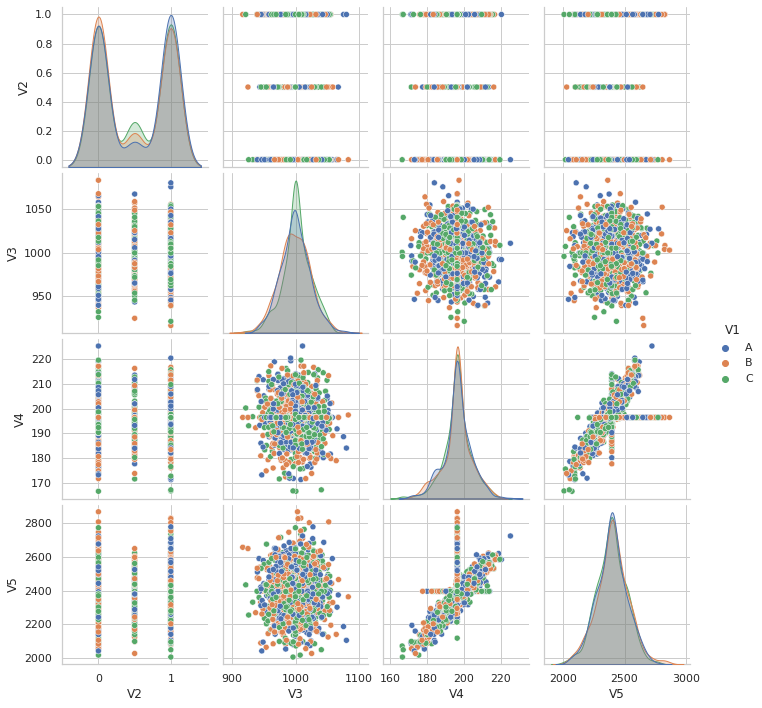

In [ ]:
sns.pairplot(dataVF1,hue='V1', hue_order=['A','B','C']) 

# como impute los valores faltantes por la media, veo la distribuin más ´picuda" entonces

#¿Para cuáles columnas tendrá sentido esto, teniendo en cuenta lo visto en el punto anterior? 
#tiene sentido para  v4 y v5, las demás no porque cambia la distribución de las variables.


Cambia un poco la distribucion de todas las variables. En V2 que es dicotomica (toma dos valores) no tiene sentido porque agrega un valor en el medio. En la relacion entre V4 y V5 agrega asintotas que no siguen la relacion, cuidado con los artifacts

En V3 tiene sentido imputar con el valor medio por clase.

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64
V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64


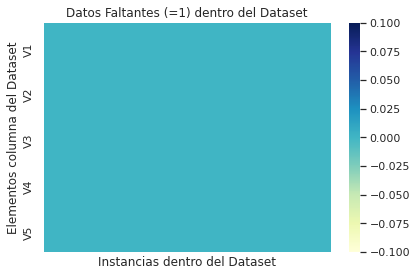

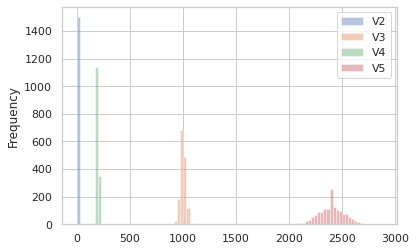

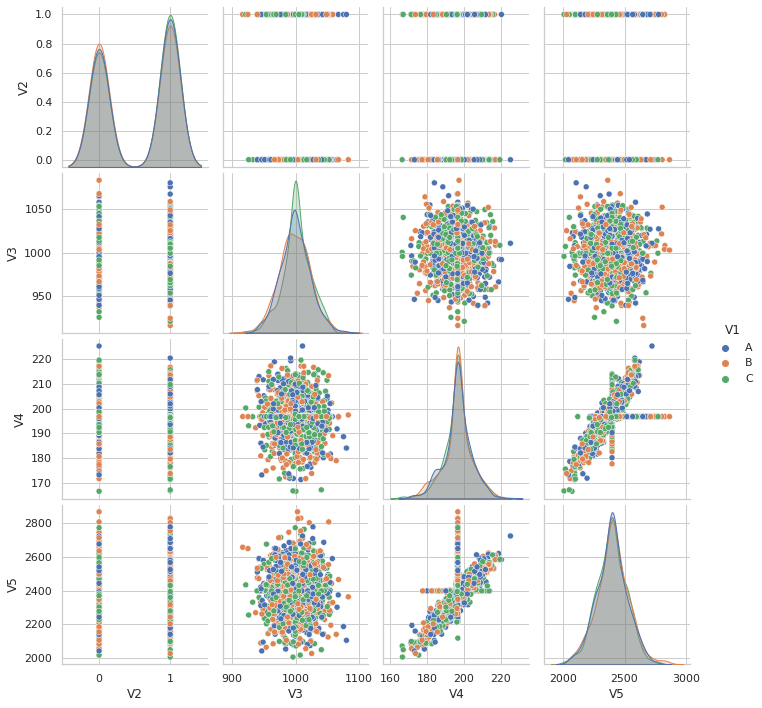

In [ ]:
#inputo los valores faltantes con la media de cada columna
dataVF = ValorFaltante.copy()
#chequeo que haya datos faltantes por cada atributo
print((dataVF.isna()).sum())

#---- Selective Treatment----------------
for i in dataVF.columns[dataVF.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
  dataVF[i].fillna(dataVF[i].mean(),inplace=True)


print((dataVF.isna()).sum())

plt.figure()
Dat=dataVF.isna()
heat=sns.heatmap(Dat.T,  cmap="YlGnBu",xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()
plt.show()

#Al imputar, ¿cambián las distribuciones?¿Esto está bien o mal?
dataVF[["V2", "V3",'V4','V5']].plot.hist(alpha=0.4, bins=100) 


#te hace una lista que te muestra los valores vacios
#numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

#for feature in numerical_with_nan:
#    median_value=dataset[feature].median()
#    dataset[feature].fillna(median_value,inplace=True)
    
#dataset[numerical_with_nan].isnull().sum()

sns.pairplot(dataVF,hue='V1', hue_order=['A','B','C']) 





**Ejercicio 2:** Propone - e implementa - una estrategia que consideres mejor, incorporando la información del punto 1. En el siguiente encuentro, te daremos el dataset sin valores faltantes, por lo que podrás comparar tus resultados. ¡Ten en cuenta que es muy raro que esto se pueda hacer! Lo que nos lleva a...




V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64
V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64


<Figure size 432x288 with 0 Axes>

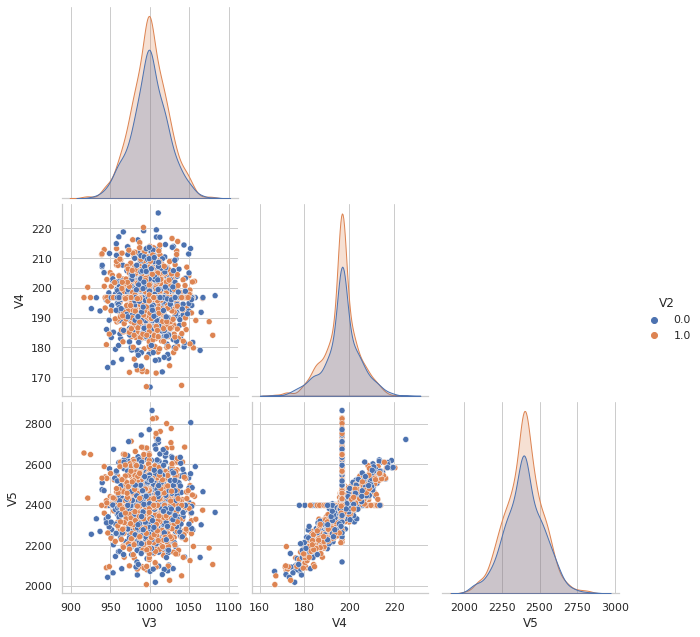

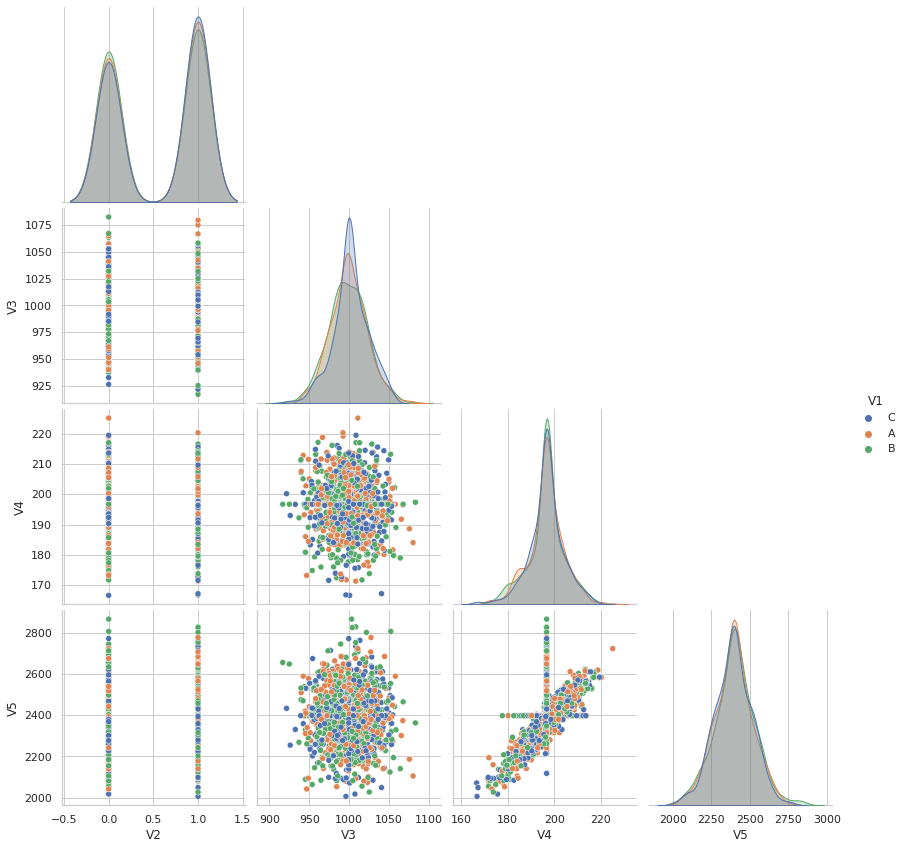

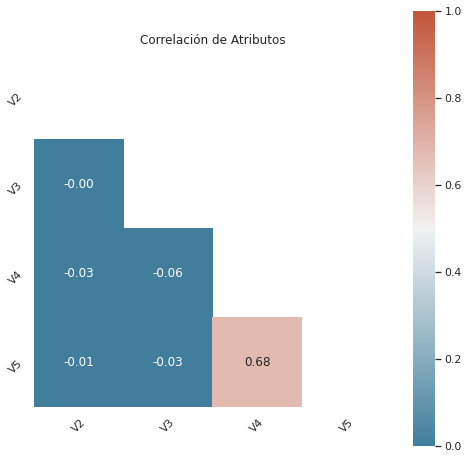

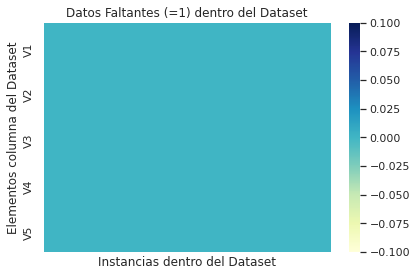

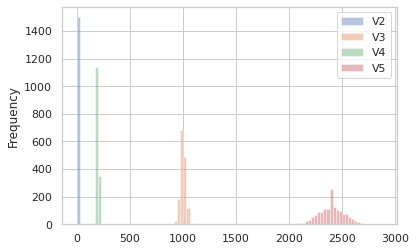

In [ ]:
#inputo los valores faltantes con la moda de cada columna
dataVF = ValorFaltante.copy()
#chequeo que haya datos faltantes por cada atributo
print((dataVF.isna()).sum())



#---- Selective Treatment----------------
for i in dataVF2.columns[dataVF2.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    dataVF2[i].fillna(dataVF2[i].mode(),inplace=True)
print((dataVF2.isna()).sum())
#completar missing values
#https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#na-values-in-groupby
#df.fillna(df.mean(),inplace=True)
plt.figure()
sns.pairplot(dataVF2,diag_kind="kde",hue='V2' , corner=True, height=3) 
sns.pairplot(dataVF2,diag_kind="kde",hue='V1' , corner=True, height=3)



#¿Te parece que hay alguna columna correlacionada con otra? analizo el heatmap de correlacion
#sólo puedo correlacionar variables numéricas
Correlation_fig(dataVF2)

plt.figure()
Dat=dataVF.isna()
heat=sns.heatmap(Dat.T,  cmap="YlGnBu",xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()
plt.show()

#Al imputar, ¿cambián las distribuciones?¿Esto está bien o mal?
dataVF[["V2", "V3",'V4','V5']].plot.hist(alpha=0.4, bins=100) 

#la cruz en el pair plot es porque impute la media en datos faltantes



In [ ]:
#inputo los valores faltantes con la mediana de cada columna
dataVF = ValorFaltante.copy()
#chequeo que haya datos faltantes por cada atributo
print((dataVF.isna()).sum())



#---- Selective Treatment----------------
for i in dataVF2.columns[dataVF2.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    dataVF2[i].fillna(dataVF2[i].median(),inplace=True)
print((dataVF2.isna()).sum())
#completar missing values
#https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#na-values-in-groupby
#df.fillna(df.mean(),inplace=True)
plt.figure()
sns.pairplot(dataVF2,diag_kind="kde",hue='V2' , corner=True, height=3) 
sns.pairplot(dataVF2,diag_kind="kde",hue='V1' , corner=True, height=3)



#¿Te parece que hay alguna columna correlacionada con otra? analizo el heatmap de correlacion
#sólo puedo correlacionar variables numéricas
Correlation_fig(dataVF2)

plt.figure()
Dat=dataVF.isna()
heat=sns.heatmap(Dat.T,  cmap="YlGnBu",xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()
plt.show()

#Al imputar, ¿cambián las distribuciones?¿Esto está bien o mal?
dataVF[["V2", "V3",'V4','V5']].plot.hist(alpha=0.4, bins=100) 

#la cruz en el pair plot es porque impute la media en datos faltantes


**Ejercicio 3:** ¿Se te ocurre algún mecanismo de evaluación de tu estrategia? Pista: considera lo que vimos sobre Machine Learning en el Bloque 1 de la carrera. 



      0  1        2        3        4
0     C  1  986.175  184.259  2224.64
1     C  1   994.13  166.654  2570.21
2     A  1  985.783  196.894  2309.24
3     A  1  1029.46  192.063  2349.26
4     A  1  1004.36  166.654  2474.04
...  .. ..      ...      ...      ...
1495  C  0  985.189  190.366     2302
1496  C  0   991.73  193.553  2277.05
1497  B  0  1032.15  166.654  2347.76
1498  C  1  984.523  196.374  2393.85
1499  C  0   1017.4  192.406  2368.91

[1500 rows x 5 columns]


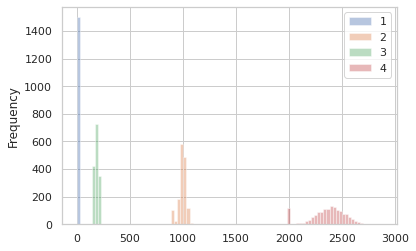

In [ ]:
dataVF3 = ValorFaltante.copy()
#usar sckitlearn imputer! para rellenar datos faltantes 
#https://scikit-learn.org/stable/modules/impute.html
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
dataVF3 =pd.DataFrame(imp.fit_transform(dataVF3))
print(dataVF3)

dataVF3.plot.hist(alpha=0.4, bins=100) 


Predecir el valor del dato faltante en función de mis otros datos que tengan condiciones similares. En este caso la mayoria son en datos continuos. Por lo que habría que plantear un regresor y luego el output debería rellenar con una mascara donde tenga datos faltantes. 
La idea más fácil que uno se le ocurre es un interpolador, que en el espacio vectorial el más sencillo puede ser un KNNimputer


### 1.2.2 Distrofia

La Distrofia Muscular de Duchenne (DMD) es una enfermedad que se transmite genéticamente de madres a hijos e hijas. Mientras que los varones mueren a temprana edad, las mujeres pueden llevar la enfermedad sin saberlo y sin síntomas. Se estima que 1 de cada 3300 mujeres son portadoras de la enfermedad.

Si bien portadoras de DMD no suelen tener síntomas, tienden a exhibir elevados niveles de enzimas o proteínas del suero, como creatina quinasa (CK, por sus siglas en inglés), hemopexina (H), lactato deshidrogenasa (LD) y piruvato quinasa (PK, por sus siglas en inglés). Los niveles de estas enzimas también pueden variar con la edad y la estación. En un estudio llevado a cabo a finales de la década del 70 se midieron esas enzimas en portadoras y no-portadoras de la enfermedad, para estudiar la posibilidad de informar a mujeres la posibilidad de que sean portadoras. Los resultados los pueden encontrar en el archivo `DS_Bitácora_19_Distrofia.csv`.

En este dataset hay valores faltantes en dos de sus columnas. Estos valores faltantes no aparecerán inmediatamente como `NaN` cuando abran el dataset con Pandas, sino que están guardados con un valor en particular. Abre y explora el dataset para descubrir ese valor. 

     edad   mes   año     CK      H    PK     LD  DMD
0    22.0   6.0  79.0   52.0   83.5  10.9  176.0    0
1    32.0   8.0  78.0   20.0   77.0  11.0  200.0    0
2    36.0   7.0  78.0   28.0   86.5  13.2  171.0    0
3    22.0  11.0  79.0   30.0  104.0  22.6  230.0    0
4    23.0   1.0  78.0   40.0   83.0  15.2  205.0    0
..    ...   ...   ...    ...    ...   ...    ...  ...
204  26.0  11.0  78.0  326.0   98.0  27.1  358.0    1
205  26.0   6.0  79.0  700.0   90.0  49.1  343.0    1
206  61.0   9.0  78.0  100.0  101.0  11.8  301.0    1
207  61.0   2.0  79.0   80.0   97.5  15.1  262.0    1
208  48.0   6.0  79.0  115.0   79.0  14.2  258.0    1

[209 rows x 8 columns]
(209, 8)
edad    0
mes     0
año     0
CK      0
H       0
PK      0
LD      0
DMD     0
dtype: int64


,edad,mes,año,CK,H,PK,LD,DMD
-9999.0,NaN,NaN,NaN,NaN,NaN,8.0,7.0,NaN


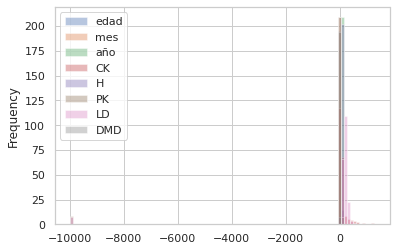

In [ ]:
#el dato faltante está guardado con un valor en particular. Lo busco visualmente
print(Valor_distrofia)
print(Valor_distrofia.shape)
#veo si tiene NANs
print((Valor_distrofia.isnull()).sum())

#veo si tiene algún dato raro, que puede ser un codificador de dato faltante
Valor_distrofia.plot.hist(alpha=0.4, bins=100) 
#el valor el -9999.0

(Valor_distrofia.apply(Valor_distrofia.value_counts)).iloc[[0]]


#obs con el discribe se puede ver el minimo y maximo de la distribución puedo uno ver eso posibles datos raros.


In [ ]:
sns.pairplot(Valor_distrofia, hue = 'DMD')
plt.show()

In [ ]:
#puedo modificarlo en la lectura del dato con el read_csv modifico el codigo por valor faltante 
data_D = pd.read_csv('DS_Bitácora_19_Distrofia.csv',na_values=-9999)

data_D.isna().sum()

#la distribución de mis datos deja de estar achatada por ese valor
sns.pairplot(data_D, hue = 'DMD')
plt.show()

Luego, investiga como puedes pasar como argumento a la función de Pandas `read_csv` para que cuando cargue los datos ya los reconozca como valores faltantes. 


-Son valores extremos numericos que no son realistas.




   edad   mes   año    CK      H    PK     LD  DMD
0  22.0   6.0  79.0  52.0   83.5  10.9  176.0    0
1  32.0   8.0  78.0  20.0   77.0  11.0  200.0    0
2  36.0   7.0  78.0  28.0   86.5  13.2  171.0    0
3  22.0  11.0  79.0  30.0  104.0  22.6  230.0    0
4  23.0   1.0  78.0  40.0   83.0  15.2  205.0    0
edad    0
mes     0
año     0
CK      0
H       0
PK      8
LD      7
DMD     0
dtype: int64


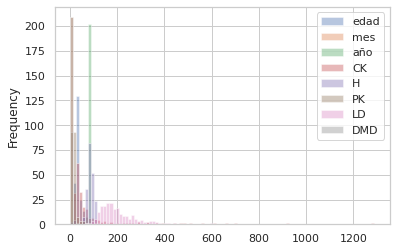

In [ ]:
#acá lo modifico por na
#na_values='-9999.0' es el argumento que reconoce como dato faltante y los transforma en NaN
Valor_distrofia1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_19_Distrofia.csv', sep=',',engine='python',na_values='-9999.0')
print(Valor_distrofia1.head())
print((Valor_distrofia1.isna()).sum())

#otra forma es abrirlo con el valor del dato faltante y reemplazarlo por NaN y luego puedo imputarlos según la forma.
#Valor_distrofia1.replace(to_replace ='-9999.0', value=np.NaN)

Valor_distrofia1.plot.hist(alpha=0.4, bins=100) 


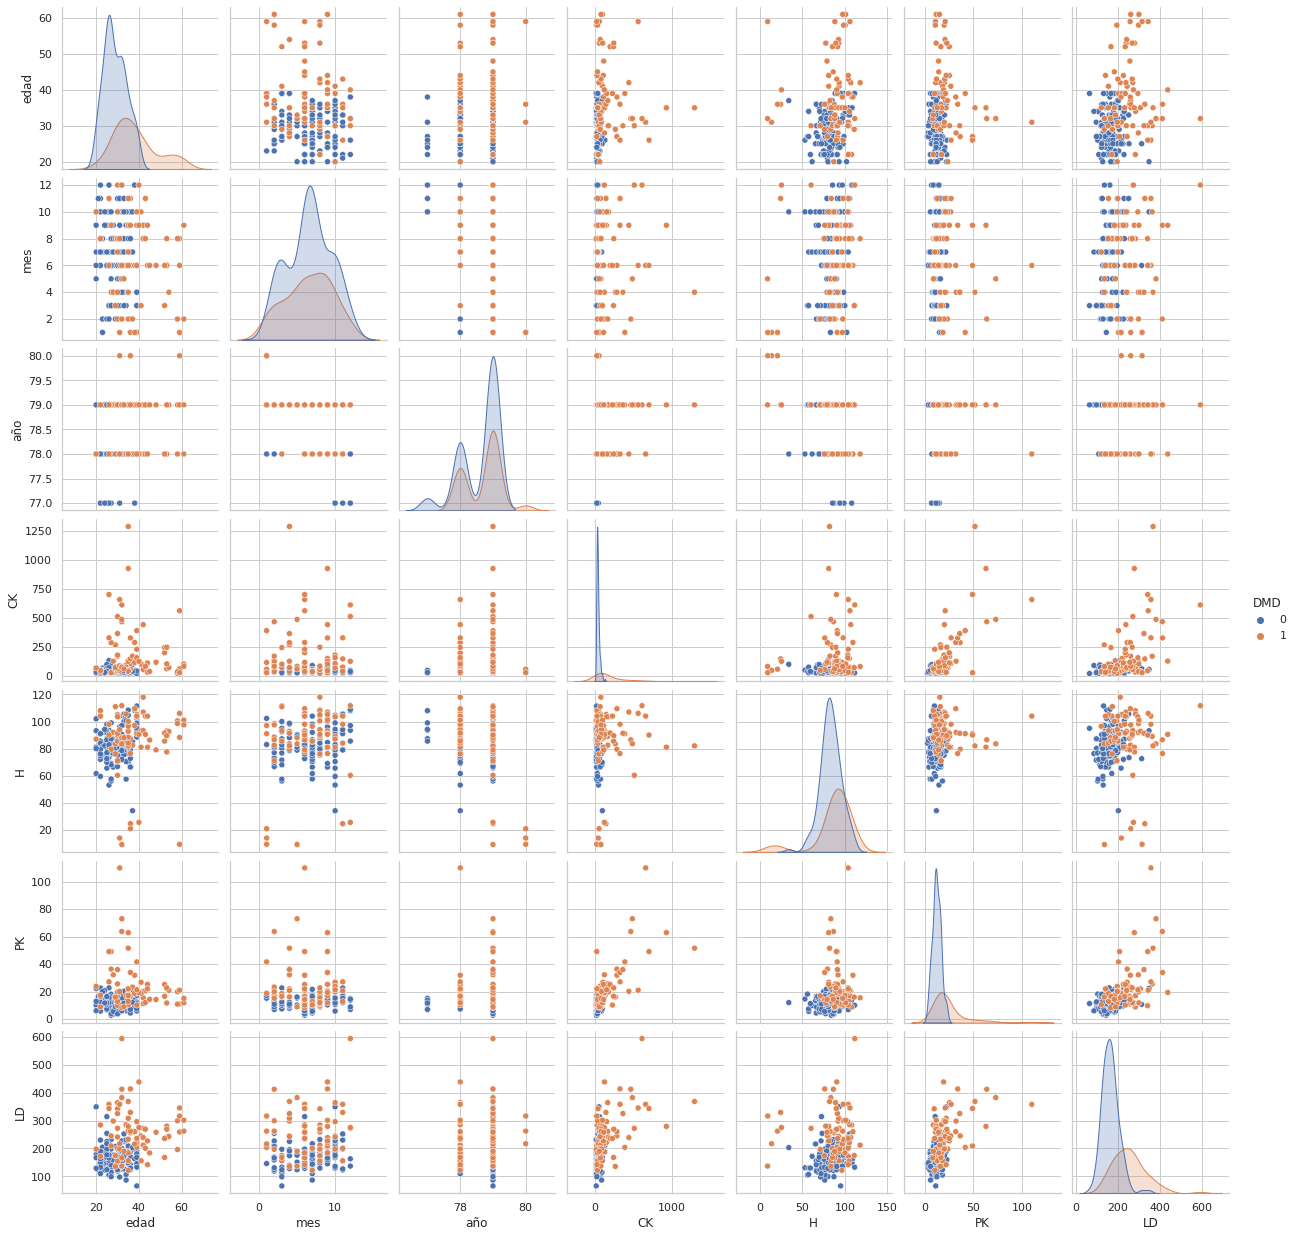

In [ ]:

sns.pairplot(Valor_distrofia1,hue='DMD') 


In [ ]:
#si imputo por la media 
Valor_distrofia1.fillna(Valor_distrofia1.mean(),inplace = True)
Valor_distrofia1.isna().sum()
sns.pairplot(Valor_distrofia1, hue = 'DMD')
plt.show()

¿Qué tipo de valores faltantes son?
¿Están asociados a los valores de otras columnas?
(Habría que ver si son MAR, MARN, MARC)

Miramos si hay relacion de datos faltantes en PK y LD con otra variable

In [ ]:
#ver al inicio lo de MAR,MNAR,MCAR
#veo en qué instancias de mi atributo están los valores faltantes
Valor_distrofia1.PK.isnull().groupby([Valor_distrofia1['año']]).sum().astype(int).reset_index(name='count')

In [ ]:
#veo en qué instancias de mi atributo están los valores faltantes
Valor_distrofia1.LD.isnull().groupby([Valor_distrofia1['año']]).sum().astype(int).reset_index(name='count')

In [ ]:
#agrupo los valores faltantes por la clase de mi atributo
Valor_distrofia1.LD.isnull().groupby([Valor_distrofia1['DMD']]).sum().astype(int).reset_index(name='count')

In [ ]:
#agr

Existen  8 valores faltantes en el atributo piruvato quinasa (PK), todos asociados a instancias portadoras, y 7 en el atributo lactato deshidrogenasa (LD), asociados a instancias no portadoras.

Este es un ejemplo en el cual tiene sentido imputar calculando el valor medio por clase (portadora - no portadora).

In [ ]:
data_D = Valor_distrofia1.copy()
data_D.isna().sum()


In [ ]:
#otra forma de imputar 
#imputar el valor medio por clase (primero agrupo por la clase y luego tomo la media)
valores_medios_PK = data_D.groupby('DMD')['PK'].mean()
valores_medios_LD = data_D.groupby('DMD')['LD'].mean()

In [ ]:
#genero un diccionario que contenga el valor medio por clase (key:value = clase:media)
valores_medios_LD = dict(round(valores_medios_LD))
print(valores_medios_LD)

valores_medios_PK = dict(round(valores_medios_PK))
print(valores_medios_PK)

In [ ]:
#imputo con el valor medio en el lugar que quiero. uso el map (que mapea seleccionando la clase de cada atributo e imputando con el valor medio. es como un for más rapido)
data_D.LD =data_D.LD.fillna(data_D.DMD.map(valores_medios_LD))

data_D.PK =data_D.PK.fillna(data_D.DMD.map(valores_medios_PK))

#chequeo que no haya valores faltantes
data_D.isna().sum()
sns.pairplot(data_D, hue = 'DMD')
plt.show()

        0     1     2      3      4     5      6    7
0    22.0   6.0  79.0   52.0   83.5  10.9  176.0  0.0
1    32.0   8.0  78.0   20.0   77.0  11.0  200.0  0.0
2    36.0   7.0  78.0   28.0   86.5  13.2  171.0  0.0
3    22.0  11.0  79.0   30.0  104.0  22.6  230.0  0.0
4    23.0   1.0  78.0   40.0   83.0  15.2  205.0  0.0
..    ...   ...   ...    ...    ...   ...    ...  ...
204  26.0  11.0  78.0  326.0   98.0  27.1  358.0  1.0
205  26.0   6.0  79.0  700.0   90.0  49.1  343.0  1.0
206  61.0   9.0  78.0  100.0  101.0  11.8  301.0  1.0
207  61.0   2.0  79.0   80.0   97.5  15.1  262.0  1.0
208  48.0   6.0  79.0  115.0   79.0  14.2  258.0  1.0

[209 rows x 8 columns]


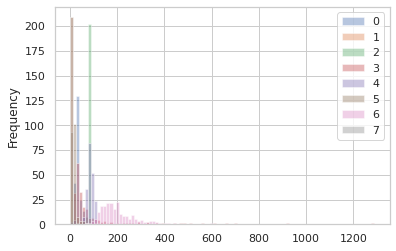

In [ ]:
#otra forma es:
#usar sckitlearn imputer! para rellenar datos faltantes 
#https://scikit-learn.org/stable/modules/impute.html
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
Valor_distrofia1 =pd.DataFrame(imp.fit_transform(Valor_distrofia1))
print(Valor_distrofia1.isna().sum())

Valor_distrofia1.plot.hist(alpha=0.4, bins=100) 



## 2. Valores Atípicos

Los datos que usaremos en esta sección, "DS_Bitácora_19_Data_VA1.csv" y "DS_Bitácora_19_Data_VA2.csv", fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de esta sección es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

Empieza por uno de los archivos, y, una vez que hayas terminado, repite para el otro.


1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?

**1. Exploración de Datos**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


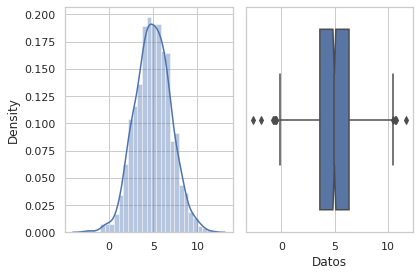

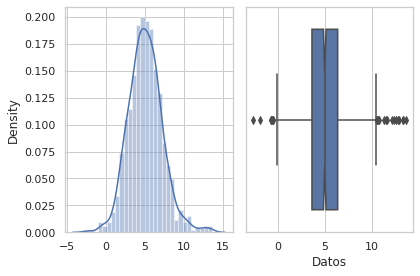

In [ ]:
#El objetivo de esta sección es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.
ValorAtipico1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_19_Data_VA1.csv', sep=',',engine='python')
ValorAtipico2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_19_Data_VA2.csv', sep=',',engine='python')

# Para ello, recomendamos hacer un distplot y un boxplot.
#¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
#según el criterio del rango intercuartil (que usa el boxplot por defecto #whis float or (float, float), default: 1.5 que es la forma del IQR)
#se observan valores atípicos por encima y por debajol.


plt.figure()
sns.boxplot(x=ValorAtipico1["Datos"],notch=True,ax=axes[0])
sns.distplot(ValorAtipico1,hist_kws={"alpha": 0.4},ax=axes[1])
plt.tight_layout()

plt.figure()
sns.boxplot(x=ValorAtipico2["Datos"],notch=True,ax=axes[0])
sns.distplot(ValorAtipico2,hist_kws={"alpha": 0.4},ax=axes[1])


In [ ]:
# Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
print(ValorAtipico1.describe(percentiles=[0.01,.25, .5, .75,0.99]))

print(ValorAtipico2.describe(percentiles=[0.01,.25, .5, .75,0.99]))

#puedo ver datos atipicos con esto, por ejemplo si el minimo maximo está muy alejado de lo real (ej edad min -4 y max 500)

             Datos
count  1000.000000
mean      4.952783
std       2.008023
min      -2.619781
1%        0.108862
25%       3.607388
50%       4.960488
75%       6.332730
99%       9.738535
max      11.628151
             Datos
count  1000.000000
mean      5.059634
std       2.162233
min      -2.619781
1%        0.108862
25%       3.630454
50%       4.995364
75%       6.371097
99%      11.359245
max      13.613645


2. Manejo de Outliers

In [ ]:

# seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?


# la técnica del rango interquartílico
def OutlierIQR(X,Atributo):
     """
      Se considera que los valores Outliers se obtienen a partir de los valores:
      Por encima de Q3 + 1.5 * IQR y por debajo de Q1 - 1.5 * IQR, que toman un 2.7σ respecto de la media.
      Ante eso se buscan los valores que son outliers inferior y superior de mi dataset en algun atributo en particular.
      1ro se calculan los percentiles 25 y 75 para conocer el IQR
      2do se calculan los valores para delimitar los extremos.
     """
     #otra forma q25,175 =np.percentile(data.Datos.values,[25,75])
     #Calculo los limites para cada tipo de propiedad principal para contar y filtrar los outliers
     Q1 = X[Atributo].quantile(0.25)
     Q3 = X[Atributo].quantile(0.75)
     IQR=Q3-Q1
     L_inf= Q1-1.5*IQR
     L_sup= Q3+1.5*IQR
     return float(L_inf), float(L_sup)   

L_inf_a1 ,L_sup_a1= OutlierIQR(ValorAtipico1,"Datos")
L_inf_a2 ,L_sup_a2= OutlierIQR(ValorAtipico2,"Datos")
print('IQR_Los valores de los límites extremos (L_inf,L_sup) de V1: '+str((L_inf_a1,L_sup_a1))+' y V2: ' +str((L_inf_a2,L_sup_a2)))

print('IQR_La cantidad de outliers sup de V1: '+str((ValorAtipico1.Datos>L_sup_a1).sum()) +' y V2: ',str((ValorAtipico2.Datos>L_sup_a2).sum()))
print('IQR_La cantidad de outliers inf de V1: '+str((ValorAtipico1.Datos<L_inf_a1).sum()) +' y V2: ',str((ValorAtipico2.Datos<L_inf_a2).sum()))



#la regla de las tres sigmas 
def OutlierSD(X,Atributo):
     """
     **ojo: se asume que es una distribucion normal**
      Se considera que los valores Outliers se obtienen a partir de los valores:
      Por encima de media + 3 * SD y por debajo de media - 3 * SD.
      Ante eso se buscan los valores que son outliers inferior y superior de mi dataset en algun atributo en particular.
      1ro se calculan el promedio y la desviacion estandar.
      2do se calculan los valores para delimitar los extremos.
     """
     #Calculo los limites para cada tipo de propiedad principal para contar y filtrar los outliers
     mean=X[Atributo].mean()
     S=X[Atributo].std()
     L_s_inf= mean-3*S
     L_s_sup= mean+3*S
     return float(L_s_inf), float(L_s_sup)   


L_inf_s_a1 ,L_sup_s_a1= OutlierSD(ValorAtipico1,"Datos")
L_inf_s_a2 ,L_sup_s_a2= OutlierSD(ValorAtipico2,"Datos")
print('3_SD_Los valores de los límites extremos (L_inf,L_sup) de V1: '+str((L_inf_s_a1,L_sup_s_a1))+' y V2: ' +str((L_inf_s_a2,L_sup_s_a2)))

print('3_SD_La cantidad de outliers sup de V1: '+str((ValorAtipico1.Datos>L_sup_s_a1).sum()) +' y V2: ',str((ValorAtipico2.Datos>L_sup_s_a2).sum()))
print('3_SD_La cantidad de outliers inf de V1: '+str((ValorAtipico1.Datos<L_inf_s_a1).sum()) +' y V2: ',str((ValorAtipico2.Datos<L_inf_s_a2).sum()))



#mascara_outliers = np.logical_or(data.Datos < minimo, data.Datos > maximo)
#mascara_outliers.sum()
#filtrado data[mascara_outliers]

#¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
#La tecnica SD selecciona menos valores porque respecto al IQR (que toma 2.7sigmas) el SD toma 3 sigmas. lo cual incluye en la distribución algunos outliers que selecciona el IQR.
#por lo que los outliers en SD son menos que en IQR.

#L_sup indica que por encima son datos por encima de 1.5IQR respecto la distribución

IQR_Los valores de los límites extremos (L_inf,L_sup) de V1: (-0.4806249877165585, 10.42074327881808) y V2: (-0.4805108714772883, 10.482061615240548)
IQR_La cantidad de outliers sup de V1: 4 y V2:  16
IQR_La cantidad de outliers inf de V1: 7 y V2:  7
3_SD_Los valores de los límites extremos (L_inf,L_sup) de V1: (-1.0712848572232803, 10.976851274677998) y V2: (-1.4270644426895407, 11.546332606024443)
3_SD_La cantidad de outliers sup de V1: 1 y V2:  9
3_SD_La cantidad de outliers inf de V1: 2 y V2:  2


In [ ]:
#filtro con una máscara
# Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?
#si se filtran y se vuelve a aplicar la tecnica para el  IQR no debería pasar nada, pero para el SD algo pasa, 
#porque la distribución de datos cambia y se modifican los valores extremos.

#Genero mi elemento sin outliers Superiores
#IQR
ValorAtipico1=ValorAtipico1.copy()
ValorAtipico2=ValorAtipico2.copy()


ValorAtipico1_woOut_IQR=ValorAtipico1[ValorAtipico1.Datos < L_sup_a1]
ValorAtipico1_woOut_IQR=ValorAtipico1_woOut_IQR[ValorAtipico1_woOut_IQR.Datos > L_inf_a1]

ValorAtipico2_woOut_IQR=ValorAtipico2[ValorAtipico2.Datos < L_sup_a2]
ValorAtipico2_woOut_IQR=ValorAtipico2_woOut_IQR[ValorAtipico2_woOut_IQR.Datos > L_inf_a2]

L_inf_a1 ,L_sup_a1= OutlierIQR(ValorAtipico1_woOut_IQR,"Datos")
L_inf_a2 ,L_sup_a2= OutlierIQR(ValorAtipico2_woOut_IQR,"Datos")
print('IQR_Los valores de los límites extremos (L_inf,L_sup) de V1: '+str((L_inf_a1,L_sup_a1))+' y V2: ' +str((L_inf_a2,L_sup_a2)))

print('IQR_La cantidad de outliers sup de V1: '+str((ValorAtipico1_woOut_IQR.Datos>L_sup_a1).sum()) +' y V2: ',str((ValorAtipico2_woOut_IQR.Datos>L_sup_a2).sum()))
print('IQR_La cantidad de outliers inf de V1: '+str((ValorAtipico1_woOut_IQR.Datos<L_inf_a1).sum()) +' y V2: ',str((ValorAtipico2_woOut_IQR.Datos<L_inf_a2).sum()))




#SD
ValorAtipico1=ValorAtipico1.copy()
ValorAtipico2=ValorAtipico2.copy()
ValorAtipico1_woOut_SD=ValorAtipico1[ValorAtipico1.Datos < L_sup_s_a1]
ValorAtipico1_woOut_SD=ValorAtipico1_woOut_SD[ValorAtipico1_woOut_SD.Datos > L_inf_s_a1]

ValorAtipico2_woOut_SD=ValorAtipico2[ValorAtipico2.Datos < L_sup_s_a2]
ValorAtipico2_woOut_SD=ValorAtipico2_woOut_SD[ValorAtipico2_woOut_SD.Datos > L_inf_s_a2]



L_inf_s_a1 ,L_sup_s_a1= OutlierSD(ValorAtipico1_woOut_SD,"Datos")
L_inf_s_a2 ,L_sup_s_a2= OutlierSD(ValorAtipico2_woOut_SD,"Datos")
print('3_SD_Los valores de los límites extremos (L_inf,L_sup) de V1: '+str((L_inf_s_a1,L_sup_s_a1))+' y V2: ' +str((L_inf_s_a2,L_sup_s_a2)))

print('3_SD_La cantidad de outliers sup de V1: '+str((ValorAtipico1_woOut_SD.Datos>L_sup_s_a1).sum()) +' y V2: ',str((ValorAtipico2_woOut_SD.Datos>L_sup_s_a2).sum()))
print('3_SD_La cantidad de outliers inf de V1: '+str((ValorAtipico1_woOut_SD.Datos<L_inf_s_a1).sum()) +' y V2: ',str((ValorAtipico2_woOut_SD.Datos<L_inf_s_a2).sum()))



IQR_Los valores de los límites extremos (L_inf,L_sup) de V1: (-0.41034392722487034, 10.358511844648174) y V2: (-0.3911070057079491, 10.342806982938122)
IQR_La cantidad de outliers sup de V1: 0 y V2:  0
IQR_La cantidad de outliers inf de V1: 0 y V2:  0
3_SD_Los valores de los límites extremos (L_inf,L_sup) de V1: (-0.9597063220357924, 10.880870640168501) y V2: (-1.0058295350109994, 10.988587279761976)
3_SD_La cantidad de outliers sup de V1: 0 y V2:  0
3_SD_La cantidad de outliers inf de V1: 0 y V2:  0


**2. Manejo de outliers**

No hay una sola forma de aplicar estas reglas.

1. Rango Intercuartílico

In [ ]:
#defino funciones auxiliares que servirán dentro del código
def Outlier(X,Atributo):
     """
      Se considera que los valores Outliers se obtienen a partir de los valores:
      Por encima de Q3 + 1.5 * IQR y por debajo de Q1 - 1.5 * IQR, que toman un 2.7σ respecto de la media.
      Ante eso se buscan los valores que son outliers inferior y superior de mi dataset en algun atributo en particular.
      1ro se calculan los percentiles 25 y 75 para conocer el IQR
      2do se calculan los valores para delimitar los extremos.
      q25,q75 == Q1 y Q3
     """
     #Calculo los limites para cada tipo de propiedad principal para contar y filtrar los outliers
     Q1 = X[Atributo].quantile(0.25)
     Q3 = X[Atributo].quantile(0.75)
     IQR=Q3-Q1
     min= Q1-1.5*IQR
     max= Q3+1.5*IQR
     return  Q1,Q3,IQR, Lim_inf, Lim_sup
 Q1, Q3, IQR, Lim_inf, Lim_sup = Outlier(ValorAtipico1,"Datos")

print( Lim_inf,Q1,IQR,Q3, Lim_sup)

In [ ]:
def MaskOutlierIQR(X,atributo,Lim_inf,Lim_sup):
     """
     Genera la máscara que delimita los datos de mi distribución, y me filtra los datos removiendo los outliers.
     """
     #mascara de outlier
     mascara_outliers = np.logical_or(X.atributo < Lim_inf, X.atributo > Lim_sup)
     #otra forma: mascara_outliers = (X.atributo < Lim_inf) | (X.atributo > Lim_sup)
     #Si uso la regla de 3sigmas: mascara_outliers =np.abs(X.atributo-X.atributo.mean())>3*X.atributo.std()

     #puedo ver la cantidad de outliers totales
     mascara_outliers.sum()
     np 
     #filtro la data de mis datos
     X_filtrado=X[mascara_outliers]
     return  mascara_outliers,X_filtrado
#No tiene sentido volver a hacer el boxplot una vez que hiciste la mascara con IQR
# SI VOLVEMOS A HACER EL BOXPLOT CON LA VARIABLE FILTRADA, EL BOXPLOT MUESTRA OUTLIERS(porque tiene un criterio definido interno) PERO NO TENGO QUE VOLVER A APLICAR UNA M

## IMPORTANTE
### ANTES DE APLICAR UNO U OTRO MÉTODO, PROBAR LOS SUPUESTOS.

La hipótesis nula de que la muestra ha sido extraída de una población con distribución de probabilidad normal se puede estudiar gráfica y/o analíticamente.

X ~ N ($\mu$,$\sigma$)

Esta definicion de outliers es útil si los datos tienen una distribucion normal. Si no es así, no se puede decir que los datos que están "lejos" sean outliers

# Supuesto de normalidad

Una herramienta visual e interesante es el gráfico cuantil-cuantil, más conocido como **Q-Q Plot**. Consiste en una comparación de los valores observados con los que deberíamos haber obtenido si la distribución de la variable bajo análisis fuese la Normal.

- Cuanto más se peguen los puntos a la línea, mayor aproximación a la normal.


Otra opción es hacer el test de Kolmogorov-Smirnov. Es una prueba no paramétrica que determina la bondad de ajuste de dos distribuciones de probabilidad entre sí.

En el caso de que queramos verificar la normalidad de una distribución, la prueba de Lilliefors conlleva algunas mejoras con respecto a la de Kolmogórov-Smirnov; y, en general, el test de Shapiro–Wilk o la prueba de Anderson-Darling son alternativas más potentes. 

Más información en:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html

`Kstest Perform the Kolmogorov-Smirnov test for goodness of fit. This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). Under the null hypothesis the two distributions are identical, G(x)=F(x). The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions.`


RECORDANDO: **El teorema del límite central**

El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal. 

In [ ]:
import scipy.stats as stats
stats.probplot(datos, dist="norm", sparams=(2.5,),plot=plt)
plt.show()
stats.kstest(datos, 'norm') #es un test que me dice cuan normal es la distribución


 Qué significa que pvalue> 0.05 ? Pueden describir el resultado del Q-Q plot?

### Ahora veamos un ejemplo de otros sets de datos

Distribución exponencial

In [ ]:
expo = np.random.exponential(size = 1000)
stats.kstest(expo , 'norm')

In [ ]:
f, axes = plt.subplots(2, 1, sharex=True)
sns.boxplot(x = expo, ax=axes[0])
sns.distplot(expo, ax=axes[1])
plt.xlim(0,8)

Distribución de Poisson

In [ ]:
pois = np.random.poisson(2, size = 1000)
pois[:20]

In [ ]:
f, axes = plt.subplots(2, 1, sharex=True)
sns.boxplot(x = pois, ax=axes[0])
sns.distplot(pois, ax=axes[1])
plt.xlim(-2, 10)

Distribucion bimodal

In [ ]:
nuevosDatos = np.concatenate( [np.random.normal(10,1,500), np.random.normal(20,1,500)] )
sns.boxplot(nuevosDatos, whis = 1.5)
sns.distplot(nuevosDatos, bins=50)


#### En estos casos que métrica usaria? Z-score o rango intercuartílico?
en casos donde la media no se vea alterada usamos z-score.
En series de potencias, la media se corre mucho entonces se usa IQR

### Extra: Outliers multivariados

Ahora que sabemos cómo detectar los outliers, es importante entender si se necesita removerlos o corregirlos. En la próxima sección vamos a considerar algunos métodos para remover los outliers o imputarles otros valores.

El scatter plot (o diagrama de dispersión) es un gráfico que muestra valores observados en dos variables.

In [ ]:
x = np.sort(np.random.normal(0,10,40))
y = np.sort(np.random.normal(5,36,40))
y[10] = 25

C:\Users\tele\Miniconda3\envs\acamica\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

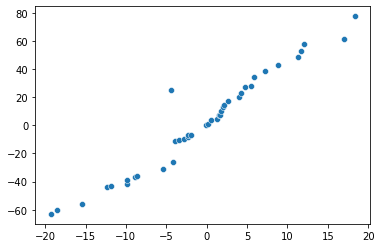

In [ ]:
sns.scatterplot(x,y)

**Identificar outliers multivariados no es fácil. Los outliers univariados, o valores extremos en una variable, son fácilmente identificables a través de un simple histograma. Los outliers bivariados como los presentados en el anterior gráfico también pueden ser identificados visualmente. Sin embargo, para el caso de más de dos variables, puede suceder que una observación no sea outlier en dos dimensiones pero si en tres o cuatro, lo que ya no es visible fácilmente. Un estimador común para detectar valores extremos multivariados es la Distancia de Mahalanobis (DM)**. 

La distancia de Mahalanobis es una medida de distancia introducida por Mahalanobis en 1936. Su utilidad radica en que es una forma de determinar la similitud entre dos variables aleatorias multidimensionales (https://es.wikipedia.org/wiki/Distancia_de_Mahalanobis).

### Recordando: 
**¿Cuál es la diferencia entre pruebas paramétricas y no paramétricas?**

Las pruebas paramétricas asumen distribuciones estadísticas subyacentes a los datos. Por tanto, deben cumplirse algunas condiciones de validez, de modo que el resultado de la prueba paramétrica sea fiable. Por ejemplo, la prueba t de Student para dos muestras independientes será fiable solo si cada muestra se ajusta a una distribución normal y si las varianzas son homogéneas.

Las pruebas no paramétricas no deben ajustarse a ninguna distribución. Pueden por tanto aplicarse incluso aunque no se cumplan las condiciones de validez paramétricas.

#Observaciones
* Los outliers no necesariamente son puntos malos
* Siempre entender de donde provienen los datos y que representan
* Analizar los outliers en contexto
* Y a veces hay que transformar los datos para obtener datos utiles

## 3. Escalado de datos - Challenge 2

Seguiremos usando los datos de la sección anterior:

1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar?

 **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Aplica la regla de las tres sigmas utilizando los datos reescalados.
    

In [3]:
#1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score.
# ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar?
#los datos reescalados idealmente tienen una media poblacional cero y un desvio de 1.

dataVa1=ValorAtipico1.copy()
dataVa2=ValorAtipico2.copy()

#reescalo con la normalización(estandarizo el valor x-mu/sigma) a mano
valor_medio = dataVa1.mean()  #dataVa1.Datos.mean()
std = dataVa1.std() #dataVa1.Datos.std()
print('el valor medio de mis datos es {} y la desviacion estandar {}'.format(float(valor_medio),float(std)))
dataVa1['Datos_Reescalados'] = (dataVa1-valor_medio)/std
print(dataVa1.head())
print('la media del dato estandarizado {} y el desvio {}'.format(dataVa1['Datos_Reescalados'].mean(),dataVa1['Datos_Reescalados'].std()))

print()
#reescalo con la normalización(estandarizo el valor x-mu/sigma)
valor_medio = dataVa2.mean()
std = dataVa2.std()
print('el valor medio {} y la desviacion estandar {}'.format(float(valor_medio),float(std)))
dataVa2['Datos_Reescalados'] = (dataVa2-valor_medio)/std
print(dataVa2.head())
print('la media del dato estandarizado {} y el desvio {}'.format(dataVa2['Datos_Reescalados'].mean(),dataVa2['Datos_Reescalados'].std()))
#cada dato esta +-X alejado en desvios estandar respecto de la media. es decir si el valor es -1,28 esta a -1,28 desivios estandar respecto de la media (el desvio es 1 aca).


#normalized_df=(df-df.mean())/df.std()
#normalized_df=(df-df.min())/(df.max()-df.min()



#data.Datos.hist(label='Datos crudos')
#data.Datos_Reescalados.hist(label='reescalados)
#plt.legend
#plt.show()


el valor medio de mis datos es 4.952783208727358 y la desviacion estandar 2.008022688650213
      Datos  Datos_Reescalados
0  2.370556          -1.285955
1  3.437876          -0.754427
2  6.300131           0.670982
3  5.403170           0.224294
4  5.722120           0.383131
la media del dato estandarizado 5.934142066621461e-17 y el desvio 1.0000000000000004

el valor medio 5.059634081667451 y la desviacion estandar 2.162232841452331
      Datos  Datos_Reescalados
0  2.370556          -1.243658
1  3.437876          -0.750039
2  6.300131           0.573711
3  5.403170           0.158880
4  5.722120           0.306390
la media del dato estandarizado 3.602673714908633e-16 y el desvio 1.000000000000001


In [4]:
#lo hago con sklearn
#Nota: Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase StandardScaler de Scikit-Learn. 
#No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). 
#https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_23_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-0-23-0-py
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

import pandas as pd
from sklearn import preprocessing
dataVa1=ValorAtipico1.copy()
dataVa2=ValorAtipico2.copy()

x = dataVa1.values #returns a numpy array
STscaler = preprocessing.StandardScaler()
x_STscaled = STscaler.fit_transform(x)
dataVa1['Datos_Reescalados_estandarizado'] =pd.DataFrame(x_STscaled)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaledminmax = min_max_scaler.fit_transform(x)
dataVa1['Datos_Reescalados_minmax'] =pd.DataFrame(x_scaledminmax)

print(dataVa1)

x = dataVa2.values #returns a numpy array
STscaler = preprocessing.StandardScaler()
x_STscaled = STscaler.fit_transform(x)
dataVa2['Datos_Reescalados_estandarizado'] =pd.DataFrame(x_STscaled)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaledminmax = min_max_scaler.fit_transform(x)
dataVa2['Datos_Reescalados_minmax'] =pd.DataFrame(x_scaledminmax)

print(dataVa2)

        Datos  Datos_Reescalados_estandarizado  Datos_Reescalados_minmax
0    2.370556                        -1.286599                  0.350250
1    3.437876                        -0.754805                  0.425160
2    6.300131                         0.671318                  0.626050
3    5.403170                         0.224406                  0.563096
4    5.722120                         0.383323                  0.585482
..        ...                              ...                       ...
995  4.613314                        -0.169141                  0.507659
996  4.188867                        -0.380622                  0.477869
997  3.394737                        -0.776299                  0.422133
998  6.384074                         0.713143                  0.631941
999  4.145870                        -0.402046                  0.474851

[1000 rows x 3 columns]
        Datos  Datos_Reescalados_estandarizado  Datos_Reescalados_minmax
0    2.370556             

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

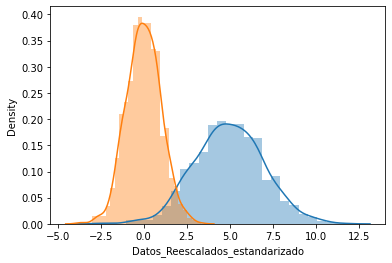

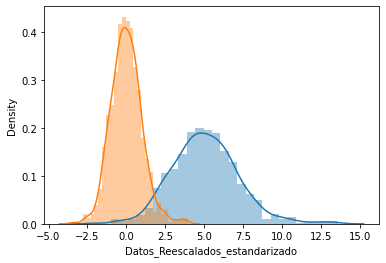

In [5]:
#Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. 
#¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
plt.figure()
sns.distplot(dataVa1['Datos'])
sns.distplot(dataVa1['Datos_Reescalados_estandarizado'])

plt.figure()
sns.distplot(dataVa2['Datos'])
sns.distplot(dataVa2['Datos_Reescalados_estandarizado'])


#data.Datos.hist(label = 'Datos Crudos')
#data.Datos_Reescalados.hist(label = 'Datos Reescalados')
#plt.legend()
#plt.show()
#se modifica la curtosis, la forma de la distribución es casisimilar. hay más datos en el centro.

Los valores de los límites extremos (L_inf,L_sup) de V1: (-3.001501125938319, 3.001501125938319) y V2: (-3.0015011259383213, 3.0015011259383213)
La cantidad de outliers sup de V1: 1 y V2:  9
La cantidad de outliers inf de V1: 2 y V2:  2


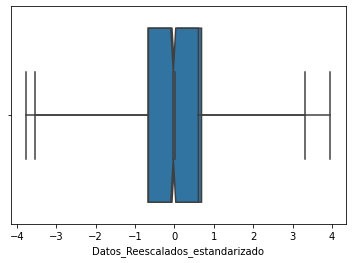

In [6]:
#Aplica la regla de las tres sigmas utilizando los datos reescalados.
#la regla de las tres sigmas 
def OutlierSD(X,Atributo):
     """
      Se considera que los valores Outliers se obtienen a partir de los valores:
      Por encima de media + 3 * SD y por debajo de media - 3 * SD.
      Ante eso se buscan los valores que son outliers inferior y superior de mi dataset en algun atributo en particular.
      1ro se calculan el promedio y la desviacion estandar.
      2do se calculan los valores para delimitar los extremos.
     """
     #Calculo los limites para cada tipo de propiedad principal para contar y filtrar los outliers
     mean=X[Atributo].mean()
     S=X[Atributo].std()
     L_s_inf= mean-3*S
     L_s_sup= mean+3*S
     return float(L_s_inf), float(L_s_sup)


L_inf_s_a1 ,L_sup_s_a1= OutlierSD(dataVa1,"Datos_Reescalados_estandarizado")
L_inf_s_a2 ,L_sup_s_a2= OutlierSD(dataVa2,"Datos_Reescalados_estandarizado")
print('Los valores de los límites extremos (L_inf,L_sup) de V1: '+str((L_inf_s_a1,L_sup_s_a1))+' y V2: ' +str((L_inf_s_a2,L_sup_s_a2)))

print('La cantidad de outliers sup de V1: '+str((dataVa1.Datos_Reescalados_estandarizado>L_sup_s_a1).sum()) +' y V2: ',str((dataVa2.Datos_Reescalados_estandarizado>L_sup_s_a2).sum()))
print('La cantidad de outliers inf de V1: '+str((dataVa1.Datos_Reescalados_estandarizado<L_inf_s_a1).sum()) +' y V2: ',str((dataVa2.Datos_Reescalados_estandarizado<L_inf_s_a2).sum()))

sns.boxplot(x=dataVa1["Datos_Reescalados_estandarizado"],notch=True, whis=3)
sns.boxplot(x=dataVa2["Datos_Reescalados_estandarizado"],notch=True, whis=3)



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

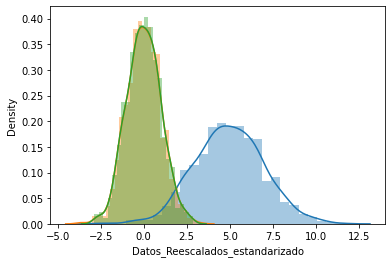

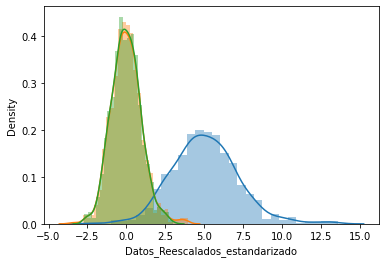

In [7]:

ValorAtipico1_woOut_SD=dataVa1[dataVa1.Datos_Reescalados_estandarizado < L_sup_s_a1]
ValorAtipico1_woOut_SD=ValorAtipico1_woOut_SD[ValorAtipico1_woOut_SD.Datos_Reescalados_estandarizado > L_inf_s_a1]

ValorAtipico2_woOut_SD=dataVa2[dataVa2.Datos_Reescalados_estandarizado < L_sup_s_a2]
ValorAtipico2_woOut_SD=ValorAtipico2_woOut_SD[ValorAtipico2_woOut_SD.Datos_Reescalados_estandarizado > L_inf_s_a2]


plt.figure()
sns.distplot(dataVa1['Datos'])
sns.distplot(dataVa1['Datos_Reescalados_estandarizado'])
sns.distplot(ValorAtipico1_woOut_SD['Datos_Reescalados_estandarizado'])
plt.figure()
sns.distplot(dataVa2['Datos'])
sns.distplot(dataVa2['Datos_Reescalados_estandarizado'])
sns.distplot(ValorAtipico2_woOut_SD['Datos_Reescalados_estandarizado'])

### Z-Score

Sea una variable $X$ tal que sige una distribución de tipo Normal con media $\mu$ y desviación estándar $\sigma$. Es decir:

$$X \sim N(\mu,\sigma)$$

Comunmente se representa con el nombre Z a la variable estandarizada:

$$ Z = \frac{X - \mu}{\sigma} $$

La intuición detrás del Z-score es describir cualquier punto de datos encontrando su relación con la desviación estándar y la media. Es correr la media de los datos a 0 y la desviación estándar es 1, como en la distribución normal estándar.

¿cómo ayuda esto a identificar los valores atípicos?
Cuando calculamos el  Z-Score cambiamos la escala, centramos los datos y buscamos valores que se encuentren muy lejos de cero. Estos casos que están muy lejos de cero serán tratados como valores atípicos. Comunmente se utiliza un umbral de -3 y 3, es decir, si el valor del Z-Score es menor que -3 o mayor que 3, es considerado outlier.

Nota: recordar que en la clase pasada vimos que el 99,75% de las observaciones se encuentran entre -3 y 3.

<img src="https://cdn-images-1.medium.com/max/2600/1*IdGgdrY_n_9_YfkaCh-dag.png" width="400">

(ver mas en ejercicios extras)

## 4. Encoders

Elige un dataset de los que hayamos usado hasta el momento - puede ser el de Titanic, el de Vinos, el del proyecto o inclusive uno que hayas visto y que te interese - y haz los siguiente ejercicios:

1. ¿De qué tipo es cada atributo?
2. Lleva todos los atributos que te interesen a una forma numérica. ¿Cómo creció tu dataset?
3. Si hay una tarea de regresión o clasificación bien definida sobre ese dataset que te interese explorar, hazlo. Para ello, entrena un modelo de árboles de decisión (no te olvides de seguir todos los pasos de un flujo de Machine Learning: elegir una métrica de evaluación, hacer una `train_test_split`, etc.). ¿Cómo cambia el desempeño del modelo con la incorporación de estos atributos? Recuerda que si utilizas un modelo de vecinos más cercanos, es importante escalar los datos antes.



In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive') #monto el drive en collab y leo el file "DS_Proyecto_01_Datos_Properati.csv" insertando la url con extension csv

Titanic=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Titanic.csv', sep=',',engine='python')


In [ ]:
#1. ¿De qué tipo es cada atributo?
print(Titanic.dtypes)
print(Titanic.head())

#pd.get_dummies(df, prefix=['col1', 'col2'])
#https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

#¿De qué tipo es cada atributo?
#Lleva todos los atributos que te interesen a una forma numérica. ¿Cómo creció tu dataset?-->get dummies

tit_transformado=pd.get_dummies(Titanic['Pclass'])
print(tit_transformado.head())
#https://www.interactivechaos.com/manual/tutorial-de-machine-learning/la-funcion-getdummies
#https://www.w3resource.com/pandas/get_dummies.php

#Si hay una tarea de regresión o clasificación bien definida sobre ese dataset que te interese explorar, hazlo. Para ello, entrena un modelo de árboles de decisión (no te olvides de seguir todos los pasos de un flujo de Machine Learning: elegir una métrica de evaluación, hacer una train_test_split, etc.). ¿Cómo cambia el desempeño del modelo con la incorporación de estos atributos? Recuerda que si utilizas un modelo de vecinos más cercanos, es importante escalar los datos antes.



#data= sns.load_dataset('iris')
#pd.get_dummies(data['species'])

In [ ]:
#2. Lleva todos los atributos que te interesen a una forma numérica. ¿Cómo creció tu dataset?
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=encoder#sklearn.preprocessing.LabelEncoder

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=encoder#sklearn.preprocessing.OneHotEncoder

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html?highlight=encoder#sklearn.preprocessing.OrdinalEncoder


In [ ]:
#3. Si hay una tarea de regresión o clasificación bien definida sobre ese dataset que te interese explorar, hazlo.
# Para ello, entrena un modelo de árboles de decisión (no te olvides de seguir todos los pasos de un flujo de Machine Learning:
# elegir una métrica de evaluación, hacer una `train_test_split`, etc.). 

#¿Cómo cambia el desempeño del modelo con la incorporación de estos atributos? 
#Recuerda que si utilizas un modelo de vecinos más cercanos, es importante escalar los datos antes.


In [ ]:
#En Pandas, explora las funcionalidades get_dummies() y map()
#En Scikit-Learn, explora la clase LabelEncoder y OneHotEncoder.


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])



In [ ]:
#1.veo el tipo de variable en cada columna
data1.info() #data1.dtypes() es resumido
#el target es un numero pero es una categoria! ojo. cuando clasifico muchas veces con numeros deben ser enteros o no siempre es flotante

#para transformar variables categoricas como categoricas, es bueno  para separar los elementos categoricos. por más que sean numeros
data1.target=data1.target.astype("category")
data1.info()



In [ ]:
#codifico las variables discretizando los valores numericos en rangos y los categoricos paso categoria a numeros 
#hago los rangos de variables continuas con pd.cut #toma el valor minimo y maximo y lo divide en bins equidistantes
#bins cantidad de categorias que quiero discretizar la variable numerica(son los rangos)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
data1['petal_length_cat']=pd.cut(data1['petal length (cm)'],bins=4,labels=False)
data1


In [ ]:

sns.countplot(x='petal_length_cat',data=data1) #cantidad de elementos por categorias

In [ ]:
sns.pairplot(data1,hue='target')

#la ultima columna son datos categorizados. si hago un modelo talvez puede generar más ruido en el bin 3, los datos muy mezclados.


In [ ]:
data1.columns

In [ ]:
#version con categorico el petal lenght
X1=data1[['sepal length (cm)', 'sepal width (cm)','petal width (cm)','petal_length_cat']]
X2=data1[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)','petal_length_cat']]
y=data1['target']


In [ ]:
#calculo dos modelos una con variable con la que ya tiene y otra reemplazo el petal_lenght_cat
#hago modelo de clasificacion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.30, random_state = 0)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)



In [ ]:
#para X1 con valores con uno categorizar una de las variables
#altera los datos y tiende a sobre entrenar el modelo. ensete caso desmejora accuracy, si solo lo hago con el dataset original

train_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test)

print("Porcentaje de aciertos set entrenamiento:", train_acc)
print("Porcentaje de aciertos set test:", test_acc)

In [ ]:
y2=data1['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state = 0)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [ ]:
#para X2 con valores normales sin categorizar una de las variables
train_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test)

print("Porcentaje de aciertos set entrenamiento:", train_acc)
print("Porcentaje de aciertos set test:", test_acc)

In [ ]:
#revisar


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
data1.target = data1.target.astype('category')

In [ ]:
data1['petal_length_cat'] = pd.cut(data1['petal length (cm)'], bins=4, labels=False)

In [ ]:
data1

In [ ]:
sns.countplot(x="petal_length_cat", data=data1)

In [ ]:
sns.pairplot(data1, hue='target')

In [ ]:
data1.columns

In [ ]:
X = data1[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'petal_length_cat']]

In [ ]:
y = data1['target']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.30, random_state = 0)
model = DecisionTreeClassifier()
model.fit(train_X,train_y)

In [ ]:
y_train_pred = model.predict(train_X)
y_test_pred = model.predict(test_X)

In [ ]:
train_acc = accuracy_score(y_train_pred, train_y)
test_acc = accuracy_score(y_test_pred, test_y)

print("Porcentaje de aciertos set entrenamiento:", train_acc)
print("Porcentaje de aciertos set test:", test_acc)


In [ ]:
X1 = data1[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'petal length (cm)']]
y1 = data1['target']

x_train, x_test, y_train, y_test = train_test_split(X1, y1,test_size=0.30, random_state = 0)
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)


y_train_pred1 = model.predict(x_train)
y_test_pred1 = model.predict(x_test)

train_acc1 = accuracy_score(y_train_pred1, y_train)
test_acc1 = accuracy_score(y_test_pred1, y_test)


print("Porcentaje de aciertos set entrenamiento:", train_acc1)
print("Porcentaje de aciertos set test:", test_acc1)


In [ ]:
X2 = data1['petal length (cm)']
y2 = data1['target']

In [ ]:
x_train1 = np.array(x_train1).reshape(len(x_train1), 1)

In [ ]:
X2 = data1['sepal width (cm)']
y2 = data1['target']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, y2,test_size=0.30, random_state = 0)
x_train1 = np.array(x_train1).reshape(len(x_train1), 1)
x_test1 = np.array(x_test1).reshape(len(x_test1), 1)

model2 = DecisionTreeClassifier()
model2.fit(x_train1,y_train1)


y_train_pred2 = model2.predict(x_train1)
y_test_pred2 = model2.predict(x_test1)

train_acc2 = accuracy_score(y_train_pred2, y_train1)
test_acc2 = accuracy_score(y_test_pred2, y_test1)


print("Porcentaje de aciertos set entrenamiento:", train_acc2)
print("Porcentaje de aciertos set test:", test_acc2)

In [ ]:
#revisar


Pipeline

In [ ]:
## SIMPLE IMPUTER

In [ ]:
# Load libraries
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45], 
              [1, 1.18, 1.33], 
              [0, 1.22, 1.27],
              [0, -0.21, -1.19],
              [np.nan, 0.87, 1.31],
              [np.nan, -0.67, -0.22]])

In [ ]:
print(X)

[[ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 0.   -0.21 -1.19]
 [  nan  0.87  1.31]
 [  nan -0.67 -0.22]]


In [ ]:
# Create Imputer object
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
imputer.fit_transform(X.T)

array([[ 0.  ,  1.  ,  0.  ,  0.  ,  0.87, -0.67],
       [ 2.1 ,  1.18,  1.22, -0.21,  0.87, -0.67],
       [ 1.45,  1.33,  1.27, -1.19,  1.31, -0.22]])

In [ ]:
imputer.fit_transform(X)

array([[ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 0.  , -0.21, -1.19],
       [ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22]])

 ## PIPELINE

In [ ]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#Create DataFrame
raw_data = {'patient': [1, 1, 1, 2, 2],
        'obs': [1, np.nan, 3, 1, 2],
        'treatment': [0, 1, 0, 1, np.nan],
            'sex':['F', 'M', 'F', 'F', 'M'],
        'score': ['strong', 'weak', 'normal', 'weak', 'strong']}
df = pd.DataFrame(raw_data, columns = ['patient', 'obs', 'treatment', 'sex','score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patient    5 non-null      int64  
 1   obs        4 non-null      float64
 2   treatment  4 non-null      float64
 3   sex        5 non-null      object 
 4   score      5 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 328.0+ bytes


In [ ]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['obs','treatment']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

categorical_features = ['score','sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor)])

DATA_PIPELINE=clf.fit_transform(df)
DATA_PIPELINE

array([[1., 0., 0., 1., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0., 1.],
       [3., 0., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 1., 0.],
       [2., 0., 0., 1., 0., 0., 1.]])